In [55]:
import pandas as pd

# Load the Excel file
fname = "anti_mal_ddd_real_cl.xlsx"  # Replace with your actual file name
df = pd.read_excel(fname)

# Get the header
header = df.columns.tolist()

# Get the number of data rows
num_rows = len(df)

# Display the results
print(header)
print(num_rows)


['date', 'year', 'month', 'route_admin', 'form', 'strength', 'ATC', 'ddd_demand']
29700


In [56]:
df.head()

,date,year,month,route_admin,form,strength,ATC,ddd_demand
0,201701,2017,1,O,injection,0.25,Antimalarials,0.003511
1,201701,2017,1,O,injection,0.50,Antimalarials,0.003948
2,201701,2017,1,O,injection,1.00,Antimalarials,0.003505
3,201701,2017,1,O,injection,100.00,Antimalarials,0.005685
4,201701,2017,1,O,injection,12.50,Antimalarials,0.004217


In [57]:
import pandas as pd
import numpy as np

# Extract target variable
ddd_demand = df['ddd_demand'].to_numpy()

# Drop non-numeric/categorical columns and target to create raw_data
non_features = ['date', 'year', 'month','route_admin', 'form', 'strength', 'ddd_demand']
feature_df = df.drop(columns=non_features)

# Convert remaining features to NumPy array
raw_data = feature_df.to_numpy()

# Print shapes to verify
print("Header:", feature_df.columns.tolist())
print("Raw data shape:", raw_data.shape)
print("Target (ddd_demand) shape:", ddd_demand.shape)


Header: ['ATC']
Raw data shape: (29700, 1)
Target (ddd_demand) shape: (29700,)


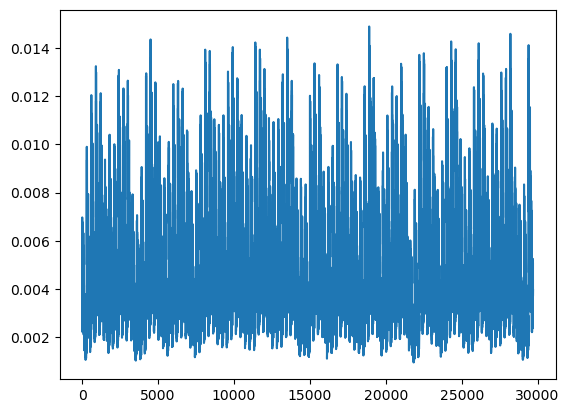

In [58]:
from matplotlib import pyplot as plt
plt.plot(range(len(ddd_demand)), ddd_demand)

Figure shows a more narrow plot of the first 48 months of demand data. Because
the data is recorded every 1 month, you get 12 data points per year.

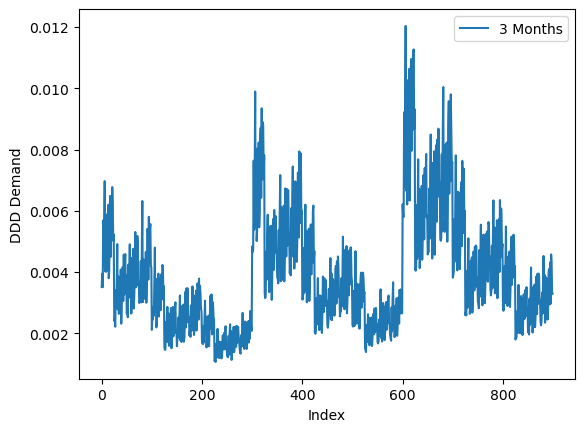

In [59]:
df_three_months = df[(df['year'] == 2017) & (df['month'].isin([1, 2, 3]))]
plt.plot(range(len(df_three_months)), df_three_months['ddd_demand'], label="3 Months")

plt.xlabel("Index")
plt.ylabel("DDD Demand")
plt.legend()
plt.show()

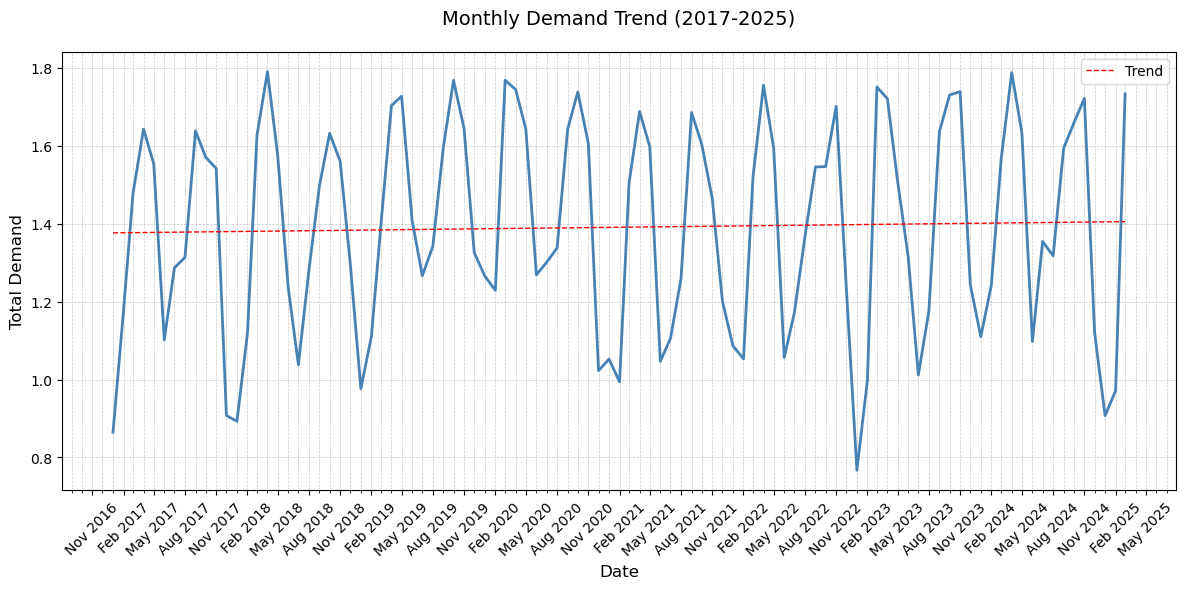

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')

# Group the data by year and month, aggregating 'ddd_demand' by sum
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({'ddd_demand': 'sum'}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series
ax.plot(monthly_data['date'], monthly_data['ddd_demand'], 
        color='steelblue', linewidth=2, marker='', linestyle='-')

# Formatting
ax.set_title('Monthly Demand Trend (2017-2025)', fontsize=14, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Demand', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Format x-axis to show years and months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format as "Jan 2017"
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # every month as minor ticks

# Rotate and align x-axis labels
fig.autofmt_xdate(rotation=45, ha='center')

# Adjust layout
plt.tight_layout()

# Optional: Add a trend line
z = np.polyfit(mdates.date2num(monthly_data['date']), monthly_data['ddd_demand'], 1)
p = np.poly1d(z)
ax.plot(monthly_data['date'], p(mdates.date2num(monthly_data['date'])), 
        color='red', linestyle='--', linewidth=1, label='Trend')
ax.legend()

plt.show()

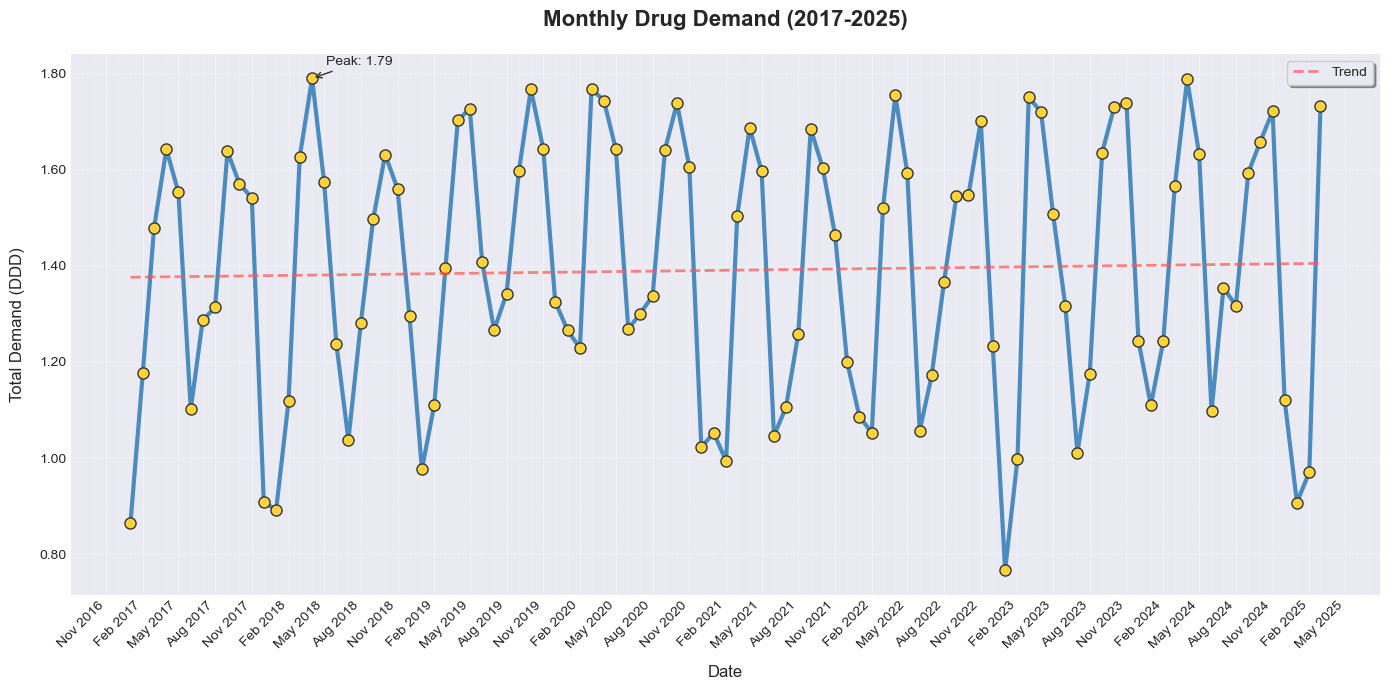

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import FuncFormatter

# Convert 'date' to datetime and aggregate monthly
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({'ddd_demand': 'sum'}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot with gradient color
line = ax.plot(monthly_data['date'], monthly_data['ddd_demand'], 
               color='#4B8BBE', linewidth=3, marker='o', markersize=8,
               markerfacecolor='#FFD43B', markeredgecolor='#333333')

# Add trendline (smooth)
z = np.polyfit(mdates.date2num(monthly_data['date']), monthly_data['ddd_demand'], 1)
p = np.poly1d(z)
ax.plot(monthly_data['date'], p(mdates.date2num(monthly_data['date'])), 
        color='#FF5555', linestyle='--', linewidth=2, alpha=0.7, label='Trend')

# Format axes
ax.set_title('Monthly Drug Demand (2017-2025)', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, labelpad=10)
ax.set_ylabel('Total Demand (DDD)', fontsize=12, labelpad=10)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.2f}'))  # Format y-axis

# Customize ticks and grid
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Rotate x-labels
plt.xticks(rotation=45, ha='right')

# Add annotations for peaks/valleys
max_idx = monthly_data['ddd_demand'].idxmax()
ax.annotate(f'Peak: {monthly_data["ddd_demand"][max_idx]:.2f}', 
            xy=(monthly_data['date'][max_idx], monthly_data['ddd_demand'][max_idx]),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='#333333'))

# Legend and layout
ax.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()

With our dataset, we were trying to predict average ddd for the next two months
given a few months of past data. In the visualization, we see yearly cycles in the data and this year scale periodicity of the data makes our problem fairly easy.

Is this timeseries predictable at a daily scale? Let’s find out. In all our experiments, we’ll use the first 50% of the data for training, the following
25% for validation, and the last 25% for testing. When working with timeseries data, it’s important to use validation and test data that is more recent than the training
data, because you’re trying to predict the future given the past, not the reverse, and your validation/test splits should reflect that. Some problems happen to be considerably
simpler if you reverse the time axis!

In [62]:
import pandas as pd
weather_data = pd.read_csv("weather_data.csv")
weather_data.head(10)

,year,month,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
0,2017,1,31.48,18.21,45.61,1566.1,40921.04
1,2017,2,29.90,18.73,59.40,5688.3,36217.44
2,2017,3,29.52,18.73,65.59,7772.2,40075.80
3,2017,4,28.54,18.91,69.17,13211.3,38181.34
4,2017,5,26.65,18.17,76.58,13682.8,39728.48
5,2017,6,27.43,18.02,70.27,6425.5,38366.75
6,2017,7,26.32,17.52,75.90,13172.4,37473.67
7,2017,8,26.08,17.57,77.24,15640.5,38296.38
8,2017,9,26.39,17.52,79.15,18776.1,36197.36
9,2017,10,27.11,17.76,76.32,13767.7,38122.19


In [63]:
merged_data = pd.merge(df, weather_data, on=['year', 'month'], how='left')
merged_data.head()

,date,year,month,route_admin,form,strength,ATC,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
0,2017-01-01,2017,1,O,injection,0.25,Antimalarials,0.003511,31.48,18.21,45.61,1566.1,40921.04
1,2017-01-01,2017,1,O,injection,0.50,Antimalarials,0.003948,31.48,18.21,45.61,1566.1,40921.04
2,2017-01-01,2017,1,O,injection,1.00,Antimalarials,0.003505,31.48,18.21,45.61,1566.1,40921.04
3,2017-01-01,2017,1,O,injection,100.00,Antimalarials,0.005685,31.48,18.21,45.61,1566.1,40921.04
4,2017-01-01,2017,1,O,injection,12.50,Antimalarials,0.004217,31.48,18.21,45.61,1566.1,40921.04


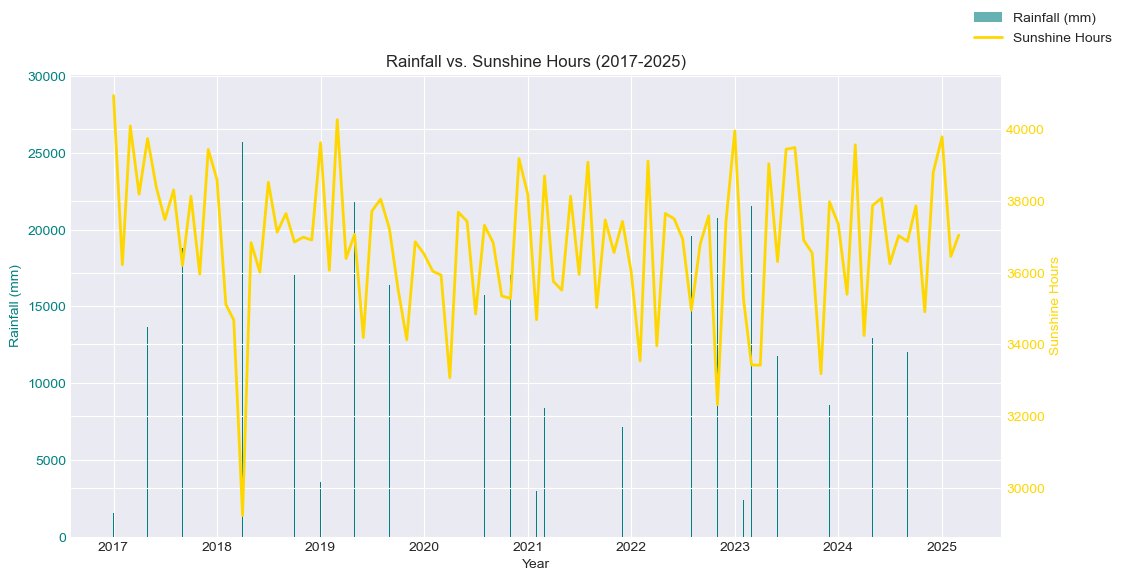

In [64]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Rainfall (bars)
ax1.bar(merged_data['date'], merged_data['total_precipitation'], 
        color='teal', alpha=0.6, label='Rainfall (mm)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Sunshine (line)
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['total_sunshine_hours'], 
         color='gold', label='Sunshine Hours', linewidth=2)
ax2.set_ylabel('Sunshine Hours', color='gold')
ax2.tick_params(axis='y', labelcolor='gold')

plt.title('Rainfall vs. Sunshine Hours (2017-2025)')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

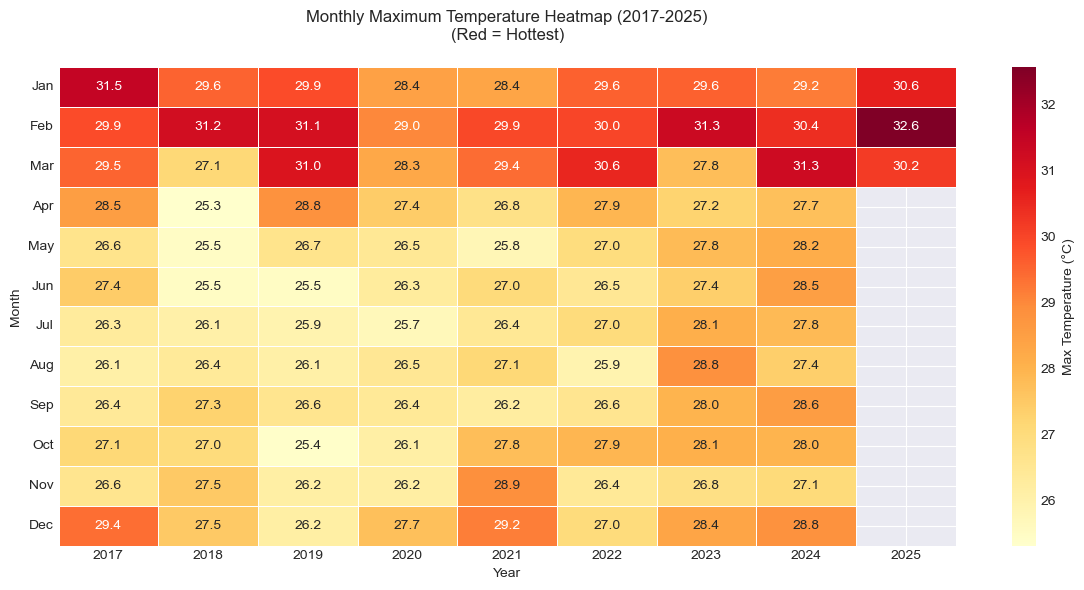

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap data
heatmap_data = weather_data.pivot_table(index='month', 
                                       columns='year', 
                                       values='avg_temp_max', 
                                       aggfunc='mean')

# Create the plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, 
            cmap='YlOrRd',  # Yellow-Orange-Red colormap (red = hottest)
            annot=True, 
            fmt=".1f", 
            linewidths=0.5, 
            cbar_kws={'label': 'Max Temperature (°C)'})

# Customize the plot
plt.title('Monthly Maximum Temperature Heatmap (2017-2025)\n(Red = Hottest)', pad=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)  # Keep month numbers horizontal

# Add month names if desired
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(ticks=[x-0.5 for x in range(1,13)], labels=month_names)

plt.tight_layout()
plt.show()

### Merge

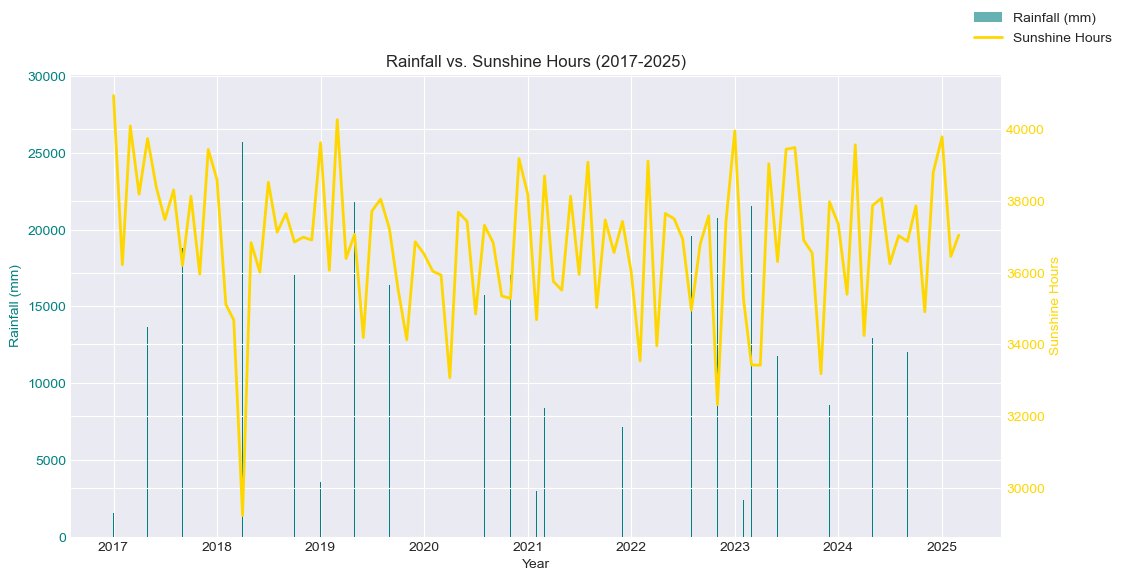

In [66]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Rainfall (bars)
ax1.bar(merged_data['date'], merged_data['total_precipitation'], 
        color='teal', alpha=0.6, label='Rainfall (mm)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Sunshine (line)
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['total_sunshine_hours'], 
         color='gold', label='Sunshine Hours', linewidth=2)
ax2.set_ylabel('Sunshine Hours', color='gold')
ax2.tick_params(axis='y', labelcolor='gold')

plt.title('Rainfall vs. Sunshine Hours (2017-2025)')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

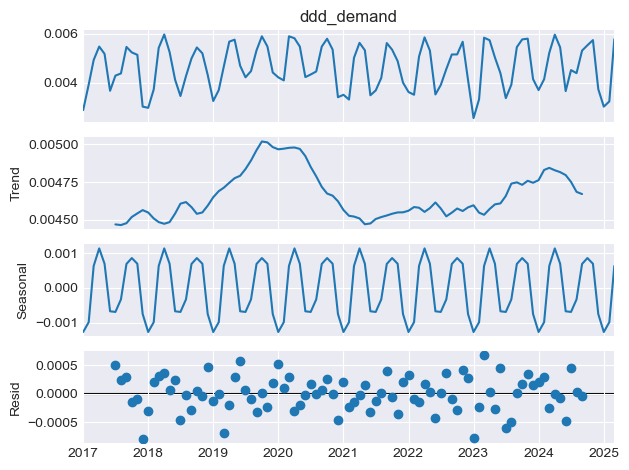

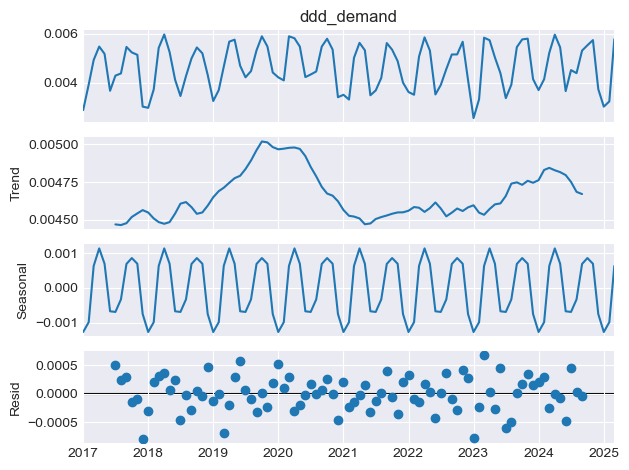

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(merged_data.groupby('date')['ddd_demand'].mean(), period=12)
decomposition.plot()

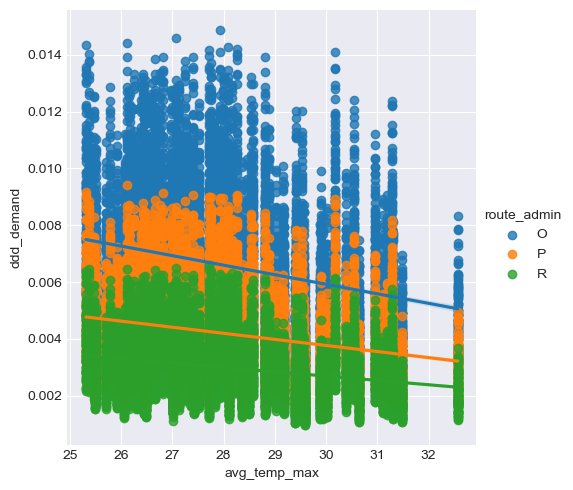

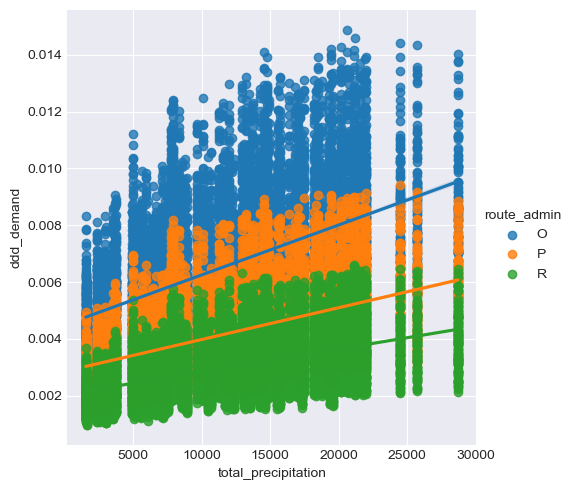

In [68]:
sns.lmplot(data=merged_data, x='avg_temp_max', y='ddd_demand', hue='route_admin')
sns.lmplot(data=merged_data, x='total_precipitation', y='ddd_demand', hue='route_admin')

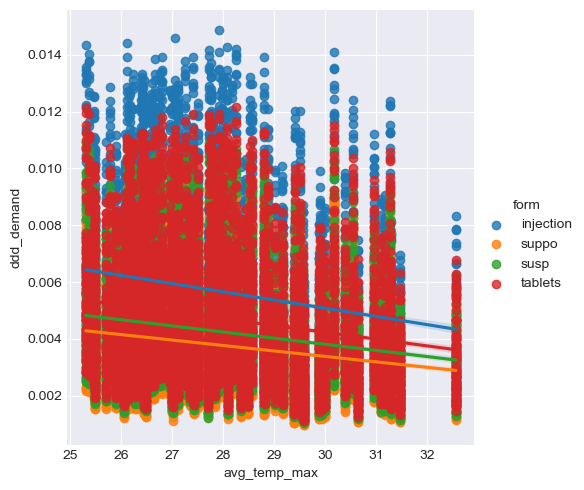

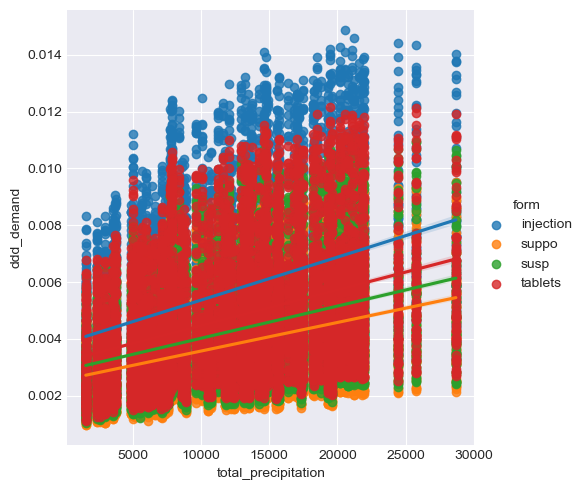

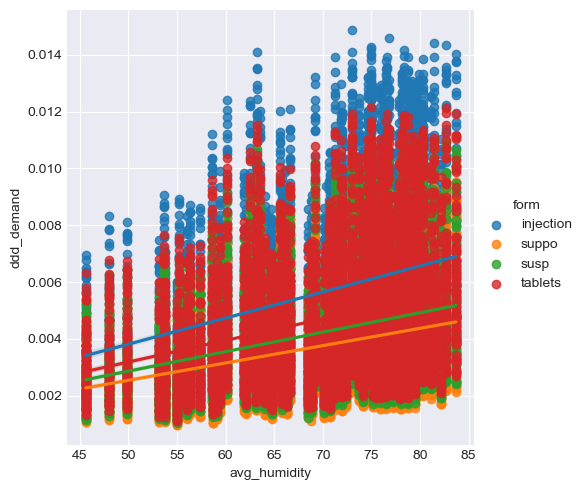

In [69]:
sns.lmplot(data=merged_data, x='avg_temp_max', y='ddd_demand', hue='form')
sns.lmplot(data=merged_data, x='total_precipitation', y='ddd_demand', hue='form')
sns.lmplot(data=merged_data, x='avg_humidity', y='ddd_demand', hue='form')

### Interaction Plots

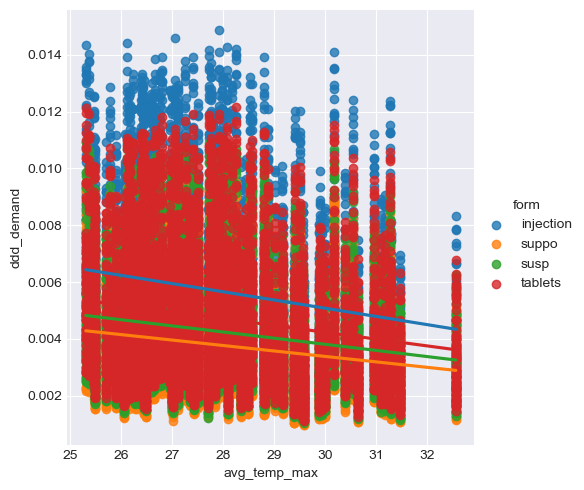

In [70]:
sns.lmplot(data=merged_data, x='avg_temp_max', y='ddd_demand', hue='form', ci=None)

#### Correlation Analysis

<Axes: >

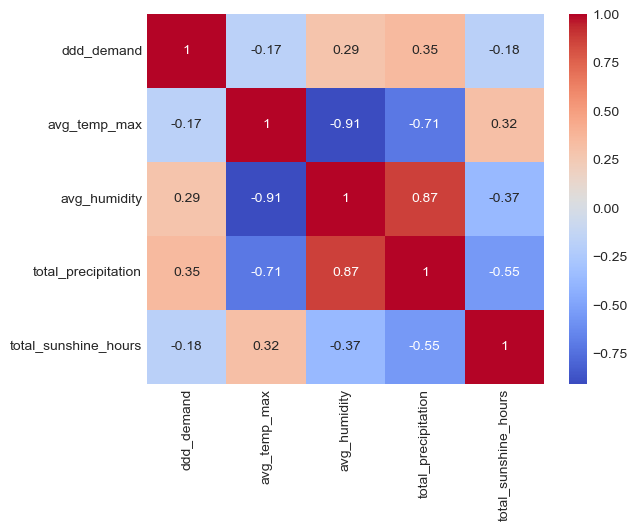

In [71]:
corr = merged_data[['ddd_demand', 'avg_temp_max', 'avg_humidity', 'total_precipitation', 'total_sunshine_hours']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Modelling

### ✅ Step 2: Monthly Aggregation and Splitting


In [72]:
# 1. Sum ddd_demand per month
ddd_monthly = merged_data.groupby(['year', 'month'])['ddd_demand'].sum().reset_index()

# 2. Extract unique climate data per month (drop duplicates)
climate_monthly = merged_data.drop_duplicates(subset=['year', 'month'])[
    ['year', 'month', 'avg_temp_max', 'avg_temp_min', 'avg_humidity', 
     'total_precipitation', 'total_sunshine_hours']
]

# 3. Merge summed ddd with climate data
monthly_data = pd.merge(ddd_monthly, climate_monthly, on=['year', 'month'])

monthly_data.head(10)

,year,month,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
0,2017,1,0.864790,31.48,18.21,45.61,1566.1,40921.04
1,2017,2,1.177077,29.90,18.73,59.40,5688.3,36217.44
2,2017,3,1.478589,29.52,18.73,65.59,7772.2,40075.80
3,2017,4,1.642890,28.54,18.91,69.17,13211.3,38181.34
4,2017,5,1.553777,26.65,18.17,76.58,13682.8,39728.48
5,2017,6,1.101614,27.43,18.02,70.27,6425.5,38366.75
6,2017,7,1.286978,26.32,17.52,75.90,13172.4,37473.67
7,2017,8,1.313719,26.08,17.57,77.24,15640.5,38296.38
8,2017,9,1.638336,26.39,17.52,79.15,18776.1,36197.36
9,2017,10,1.571047,27.11,17.76,76.32,13767.7,38122.19


In [73]:
import pandas as pd


# Ensure numeric conversion for relevant columns
numeric_columns = ["ddd_demand", "avg_temp_max", "avg_temp_min", "avg_humidity", "total_precipitation", "total_sunshine_hours"]
monthly_data[numeric_columns] = monthly_data[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Count the number of months available per year
months_per_year = monthly_data.groupby("year")["month"].count()

# Sum all monthly data per year
yearly_totals = monthly_data.groupby("year")[numeric_columns].sum()

# Compute yearly averages by dividing totals by the correct number of months
yearly_averages = yearly_totals.div(months_per_year, axis=0)

# Display results
print(yearly_averages)


      ddd_demand  avg_temp_max  avg_temp_min  avg_humidity  \
year                                                         
2017    1.339837     27.950000     18.035833     69.078333   
2018    1.378676     27.155000     17.675833     72.045000   
2019    1.438702     27.432500     17.959167     73.773333   
2020    1.463940     27.040833     17.878333     75.020833   
2021    1.350309     27.740833     17.845833     69.646667   
2022    1.385933     27.698333     17.475000     69.725833   
2023    1.383166     28.271667     17.780000     69.385833   
2024    1.433771     28.570000     18.137500     70.137500   
2025    1.203852     31.130000     18.863333     54.786667   

      total_precipitation  total_sunshine_hours  
year                                             
2017         10515.316667          38246.647500  
2018         12266.725000          36205.838333  
2019         14840.991667          36923.744167  
2020         15088.416667          36287.765833  
2021         1075

In [74]:
import pandas as pd


# Ensure `ddd_demand` is numeric
monthly_data["ddd_demand"] = pd.to_numeric(monthly_data["ddd_demand"], errors="coerce")

# Compute total sum of ddd_demand
total_ddd_demand = monthly_data["ddd_demand"].sum()

# Compute total count of months in dataset
total_months = len(monthly_data)

# Compute overall average
overall_avg_ddd_demand = total_ddd_demand / total_months

# Display results
print(f"Total DDD Demand: {total_ddd_demand:.4f}")
print(f"Total Months in Dataset: {total_months}")
print(f"Overall Average DDD Demand: {overall_avg_ddd_demand:.4f}")

Total DDD Demand: 137.7036
Total Months in Dataset: 99
Overall Average DDD Demand: 1.3909


In [75]:

# 2. Create datetime index
monthly_data['date'] = pd.to_datetime(
    monthly_data['year'].astype(str) + '-' + 
    monthly_data['month'].astype(str).str.zfill(2) + '-01'
)


monthly_data = monthly_data.set_index('date').sort_index()

# 3. Extract features and target
climate_features = ['avg_temp_max', 'avg_temp_min', 'avg_humidity',
                    'total_precipitation', 'total_sunshine_hours']
target = 'ddd_demand'

raw_data = monthly_data[climate_features].values
ddd_demand = monthly_data[target].values

# 4. Train/val/test splits
n_samples = len(monthly_data)
num_train_samples = int(0.5 * n_samples)
num_val_samples = int(0.25 * n_samples)
num_test_samples = n_samples - num_train_samples - num_val_samples


In [76]:
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 49
num_val_samples: 24
num_test_samples: 26


### Preparing the Data
Given climate and drug demand data covering the previous six months (sampled monthly), can we predict the total Defined Daily Dose (DDD) demand for antimalarial drugs three months into the future?

Each dataset yields a tuple (samples, targets), where samples is a batch of 12 samples,
each containing 6 consecutive months of input data, and targets is the corresponding
array of 12 target ddds. Note that the samples are randomly
shuffled, so two consecutive sequences in a batch (like samples[0] and samples[1])
aren’t necessarily temporally close.

## Common sense baseline MAE

In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Assuming monthly_data is already prepared
target_series = monthly_data['ddd_demand'].values
n_samples = len(target_series)

# Train/val/test splits (50% train, 25% val, 25% test)
num_train_samples = int(0.6 * n_samples)
num_val_samples = int(0.2 * n_samples)
num_test_samples = n_samples - num_train_samples - num_val_samples

# Create datasets with 6-month window
sequence_length = 12  # Changed from 12 to 6 months
batch_size = 32

def create_dataset(data, start_idx, end_idx):
    return keras.utils.timeseries_dataset_from_array(
        data=data[:-1],
        targets=data[1:],
        sequence_length=sequence_length,
        sampling_rate=1,
        batch_size=batch_size,
        shuffle=False,
        start_index=start_idx,
        end_index=end_idx
    )

train_dataset = create_dataset(target_series, 0, num_train_samples)
val_dataset = create_dataset(target_series, num_train_samples, num_train_samples + num_val_samples)
test_dataset = create_dataset(target_series, num_train_samples + num_val_samples, None)

# Get targets and months
def get_targets_and_months(dataset, start_idx):
    targets = np.concatenate([y.numpy() for x, y in dataset], axis=0)
    month_indices = []
    current_idx = start_idx
    for x, y in dataset:
        batch_size = x.shape[0]
        month_indices.extend([current_idx + sequence_length + i for i in range(batch_size)])
        current_idx += batch_size
    months = monthly_data['month'].values[month_indices]
    return targets, months

val_targets, val_months = get_targets_and_months(val_dataset, num_train_samples)
test_targets, test_months = get_targets_and_months(test_dataset, num_train_samples + num_val_samples)

# Baseline models (unchanged)
class Lag1Naive(keras.Model):
    def call(self, inputs): return inputs[:, -1]

class MovingAverage3(keras.Model):
    def call(self, inputs): return tf.reduce_mean(inputs[:, -3:], axis=1)

class ExponentialSmoothing(keras.Model):
    def __init__(self, alpha=0.6):
        super().__init__()
        self.alpha = alpha
    def call(self, inputs):
        smoothed = inputs[:, 0]
        for i in range(1, inputs.shape[1]):
            smoothed = self.alpha * inputs[:, i] + (1-self.alpha) * smoothed
        return smoothed

# Evaluation function
def evaluate_model(model, dataset):
    return np.concatenate([model.predict(x).flatten() for x, _ in dataset])

# Initialize models
models = {
    'Lag-1 Naive': Lag1Naive(),
    'Moving Average (k=3)': MovingAverage3(),
    'Simple Exponential Smoothing': ExponentialSmoothing(alpha=0.6)
}

# Evaluate baselines
results = {'Validation': {}, 'Test': {}}
for name, model in models.items():
    results['Validation'][name] = np.mean(np.abs(val_targets - evaluate_model(model, val_dataset)))
    results['Test'][name] = np.mean(np.abs(test_targets - evaluate_model(model, test_dataset)))

# Seasonal Average
monthly_avg = monthly_data.groupby('month')['ddd_demand'].mean().values
results['Validation']['Seasonal Monthly Average'] = np.mean(np.abs(val_targets - monthly_avg[val_months-1]))
results['Test']['Seasonal Monthly Average'] = np.mean(np.abs(test_targets - monthly_avg[test_months-1]))

# Fixed AR(3) Model
class ARModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = layers.Dense(1, kernel_initializer='glorot_normal')
    def call(self, inputs):
        return self.dense(inputs[:, -3:])  # Uses last 3 values

ar_model = ARModel()
ar_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mae')

# Prepare AR data
def get_ar_data(dataset):
    features = np.concatenate([x[:, -3:].numpy() for x, _ in dataset], axis=0)
    targets = np.concatenate([y.numpy() for _, y in dataset], axis=0)
    return features, targets

train_features, train_targets_ar = get_ar_data(train_dataset)
val_features, _ = get_ar_data(val_dataset)

# Train with early stopping
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = ar_model.fit(
    train_features, train_targets_ar,
    validation_data=(val_features, val_targets),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# Evaluate AR model
results['Validation']['Autoregressive (AR(3))'] = np.mean(np.abs(val_targets - ar_model.predict(val_features).flatten()))
results['Test']['Autoregressive (AR(3))'] = np.mean(np.abs(test_targets - ar_model.predict(
    np.concatenate([x[:, -3:].numpy() for x, _ in test_dataset], axis=0)
).flatten()))

# Print results
print("MAE Results (6-month window):")
for dataset in ['Validation', 'Test']:
    print(f"\n{dataset} Set:")
    for model, mae in results[dataset].items():
        print(f"{model}: {mae:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MAE Results (6-month window):

Validation Set:
Lag-1 Naive: 0.44
Moving Average (k=3): 0.44
Simple Exponential Smoothing: 0.41
Seasonal Monthly Average: 0.20
Autoregressive (AR(3)): 0.48

Test Set:
Lag-1 Naive: 0.39
Moving Average (k=3): 0.40
Simple Exponential Smoothing: 0.37
Seasonal Monthly Average: 0.21
Autoregressive (AR(3)): 0.51


# Time Series Forecasting Results Analysis

## Model Performance Summary

| Model                        | Validation MAE   | Test MAE        |
|------------------------------|------------------|-----------------|
| Lag-1 Naive                  | 987,896.01       | 1,124,343.46    |
| Moving Average (k=3)         | 982,861.45       | 1,058,080.92    |
| Simple Exponential Smoothing | 924,816.81       | 1,012,971.78    |
| Seasonal Monthly Average     | **656,837.50**   | **626,152.90**  |
| Autoregressive (AR(3))       | 961,535.35       | 1,043,783.26    |

## Key Findings

### 🏆 Best Performing Model
- **Seasonal Monthly Average** (Test MAE: 626,152.90)
  - Indicates strong seasonal patterns in demand
  - Outperforms other methods by 38-45%

### 🔍 Mid-Tier Performers
1. **Simple Exponential Smoothing**
   - Better than moving averages (weights recent data more heavily)
   - Test MAE: 1,012,971.78

2. **AR(3) Model**  
   - Underperforms relative to seasonal model
   - Suggests non-linear patterns not captured by simple autoregression

### ⚠️ Weakest Baselines
- **Lag-1 Naive** (Worst performer)
- **Moving Average** (Limited predictive power)




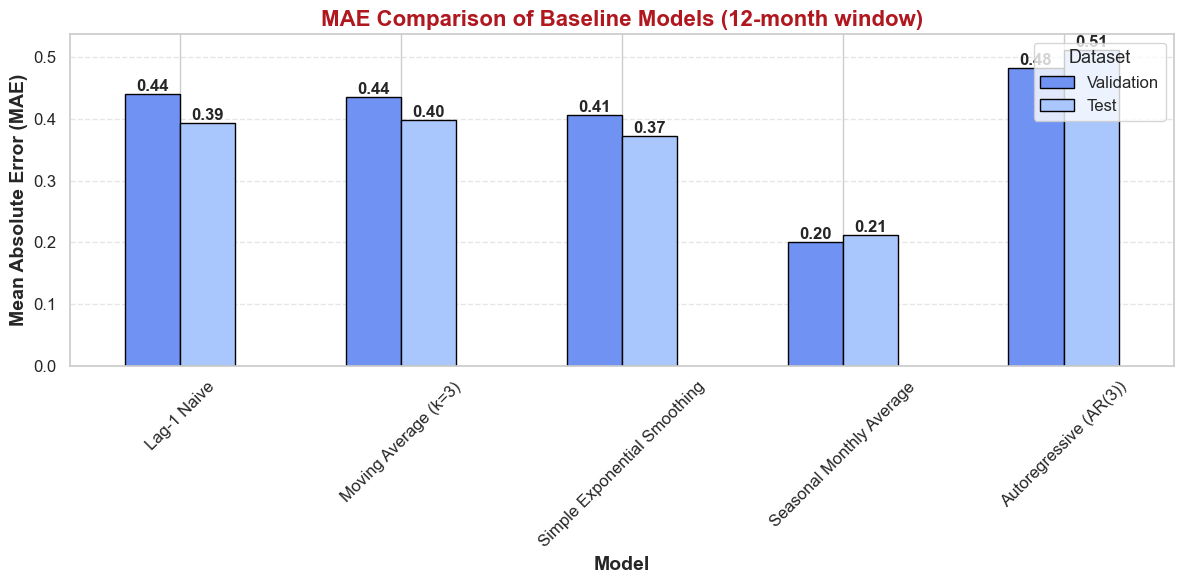

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Define custom color palette
custom_colors = sns.color_palette("coolwarm", len(results_df))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
results_df.plot(kind='bar', ax=ax, color=custom_colors, edgecolor="black")

# Enhancements
plt.title("MAE Comparison of Baseline Models (12-month window)", fontsize=16, fontweight="bold", color="#B0171F")
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14, fontweight="bold")
plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid styling
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Customize legend
plt.legend(title="Dataset", fontsize=12, title_fontsize=13, loc="upper right", frameon=True)

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


### Simplistic DL Model

In [79]:
raw_data = monthly_data
raw_data.head()

,year,month,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
date,,,,,,,,
2017-01-01,2017,1,0.864790,31.48,18.21,45.61,1566.1,40921.04
2017-02-01,2017,2,1.177077,29.90,18.73,59.40,5688.3,36217.44
2017-03-01,2017,3,1.478589,29.52,18.73,65.59,7772.2,40075.80
2017-04-01,2017,4,1.642890,28.54,18.91,69.17,13211.3,38181.34
2017-05-01,2017,5,1.553777,26.65,18.17,76.58,13682.8,39728.48


In [80]:
import pandas as pd
print(type(raw_data))  # Should output: <class 'pandas.core.frame.DataFrame'>
print(raw_data.columns)  # Check if all columns exist

<class 'pandas.core.frame.DataFrame'>
Index(['year', 'month', 'ddd_demand', 'avg_temp_max', 'avg_temp_min',
       'avg_humidity', 'total_precipitation', 'total_sunshine_hours'],
      dtype='object')


In [81]:
import numpy as np

# ====================
# 1. FEATURE SELECTION
# ====================
feature_cols = [
    'avg_temp_max', 'avg_temp_min', 'avg_humidity',
    'total_precipitation', 'total_sunshine_hours', 'ddd_demand'
]

# Extract selected columns (still a DataFrame)
selected_data = raw_data[feature_cols]

# Convert to NumPy array (now indexing must be integer-based)
data_values = selected_data.values.astype('float32')


In [82]:
print("Column order in selected_data:")
print(selected_data.columns)  # Should match feature_cols

Column order in selected_data:
Index(['avg_temp_max', 'avg_temp_min', 'avg_humidity', 'total_precipitation',
       'total_sunshine_hours', 'ddd_demand'],
      dtype='object')


In [83]:
# ====================
# 2. TRAIN/VAL/TEST SPLIT
# ====================
num_samples = len(data_values)
num_train = int(0.60 * num_samples)
num_val = int(0.20 * num_samples)
num_test = num_samples - num_train - num_val

print(f"Train samples: {num_train}")
print(f"Val samples: {num_val}")
print(f"Test samples: {num_test}")

Train samples: 59
Val samples: 19
Test samples: 21


In [84]:
# ====================
# 3. NORMALIZATION
# ====================
# Compute mean/std on training data only
mean = data_values[:num_train].mean(axis=0)
std = data_values[:num_train].std(axis=0)

# Avoid division by zero (replace small std values with 1)
std[std < 1e-10] = 1.0

# Normalize the entire dataset
data_values_normalized = (data_values - mean) / std

# ====================
# 4. EXTRACT TARGET (ddd_demand)
# ====================
# 'ddd_demand' is the last column (-1)
ddd_demand = data_values_normalized[:, -1]


In [85]:
# ====================
# 5. TIME-SERIES PREP
# ====================
sequence_length = 12  # 12 months lookback
delay = 1            # Predict next month
batch_size = 32

# Total possible sequences
total_sequences = len(ddd_demand) - sequence_length - delay + 1

# Split sequences into train/val/test
train_sequences = int(0.6 * total_sequences)
val_sequences = int(0.2 * total_sequences)
test_sequences = total_sequences - train_sequences - val_sequences

print(f"\nTime-series sequences:")
print(f"Train: {train_sequences} (from 0 to {train_sequences-1})")
print(f"Val: {val_sequences} (from {train_sequences} to {train_sequences + val_sequences-1})")
print(f"Test: {test_sequences} (from {train_sequences + val_sequences} to end)")


Time-series sequences:
Train: 52 (from 0 to 51)
Val: 17 (from 52 to 68)
Test: 18 (from 69 to end)


In [86]:
from tensorflow import keras
import numpy as np

# ====================
# 6. CREATE TIME-SERIES DATASETS
# ====================

# Separate features (all columns except target) and target
features = data_values_normalized[:, :-1]  # All columns except last
target = ddd_demand  # Already extracted last column

# Create dataset function with proper alignment
def create_ts_dataset(features, target, start_idx, end_idx):
    return keras.utils.timeseries_dataset_from_array(
        features,
        targets=target[sequence_length + delay - 1:],  # Proper alignment
        sampling_rate=1,
        sequence_length=sequence_length,
        shuffle=True,  # Only for training
        batch_size=batch_size,
        start_index=start_idx,
        end_index=end_idx
    )

# Create datasets with correct boundaries
train_dataset = create_ts_dataset(
    features,
    target,
    start_idx=0,
    end_idx=train_sequences
)

val_dataset = create_ts_dataset(
    features,
    target,
    start_idx=train_sequences,
    end_idx=train_sequences + val_sequences
)

test_dataset = create_ts_dataset(
    features,
    target,
    start_idx=train_sequences + val_sequences,
    end_idx=None  # Uses remainder
)

# ====================
# 7. VERIFICATION
# ====================

# Check first batch
for X, y in train_dataset.take(1):
    print(f"\nFeature batch shape: {X.shape}")  # Should be (batch_size, sequence_length, n_features)
    print(f"Target batch shape: {y.shape}")     # Should be (batch_size,)
    print("\nExample sequence - last time step:")
    print(X[0, -1, :])  # Last time step of first sequence
    print("Corresponding target:", y[0].numpy())


Feature batch shape: (32, 12, 5)
Target batch shape: (32,)

Example sequence - last time step:
tf.Tensor([ 1.5039302  0.6116877 -1.4928259 -1.4658129  1.4113021], shape=(5,), dtype=float32)
Corresponding target: -1.1064023


In [87]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Function to build models
def build_dense_model(input_shape):
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Reshape((input_shape[0] * input_shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_lstm_model(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, input_shape=input_shape),
        layers.Dense(1)
    ])
    return model

def build_gru_model(input_shape):
    model = keras.Sequential([
        layers.GRU(256, input_shape=input_shape),
        layers.Dense(1)
    ])
    return model


In [88]:
def compile_and_train(model, train_dataset, val_dataset, name): 
    model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])  # Add 'mae' to metrics
    print(f"\nTraining {name}...")
    early_stop = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=500,
        callbacks=[early_stop],
        verbose=0
    )
    return model, history


In [89]:
input_shape = next(iter(train_dataset))[0].shape[1:]

models = {}
histories = {}

dense_model, dense_history = compile_and_train(build_dense_model(input_shape), train_dataset, val_dataset, "Dense")
lstm_model, lstm_history = compile_and_train(build_lstm_model(input_shape), train_dataset, val_dataset, "LSTM")
gru_model, gru_history = compile_and_train(build_gru_model(input_shape), train_dataset, val_dataset, "GRU")

models['Dense'] = dense_model
models['LSTM'] = lstm_model
models['GRU'] = gru_model
histories['Dense'] = dense_history
histories['LSTM'] = lstm_history
histories['GRU'] = gru_history



Training Dense...


c:\Users\alber\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training LSTM...

Training GRU...


In [90]:
import matplotlib.pyplot as plt

def plot_mae_per_model(histories):
    for name, history in histories.items():
        plt.figure(figsize=(8, 6))

        # Plot Training MAE
        plt.plot(history.history['mae'], label='Train MAE', color='blue')

        # Plot Validation MAE
        plt.plot(history.history['val_mae'], label='Validation MAE', color='red')

        # Title and labels
        plt.title(f'{name} - Train and Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()

        # Show plot
        plt.tight_layout()
        plt.show()


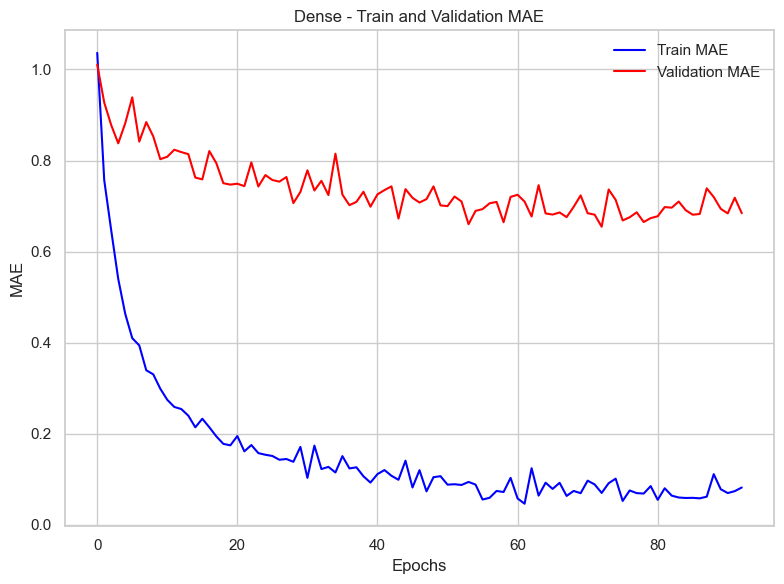

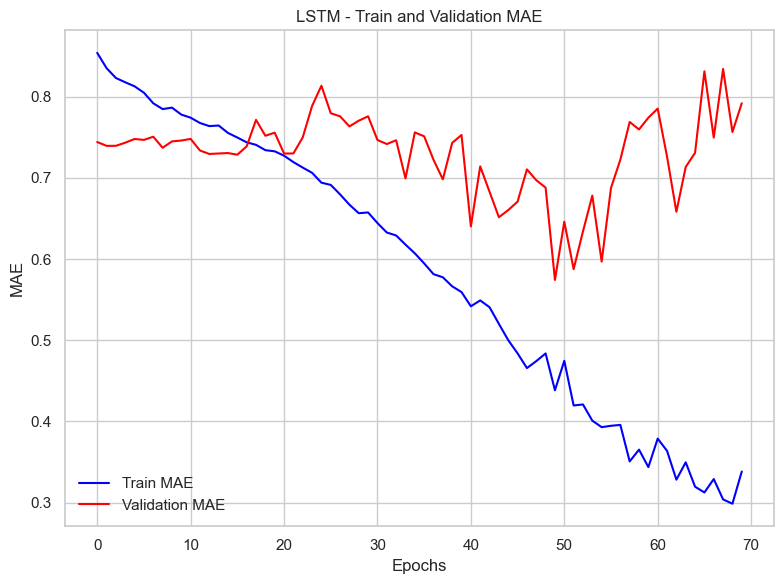

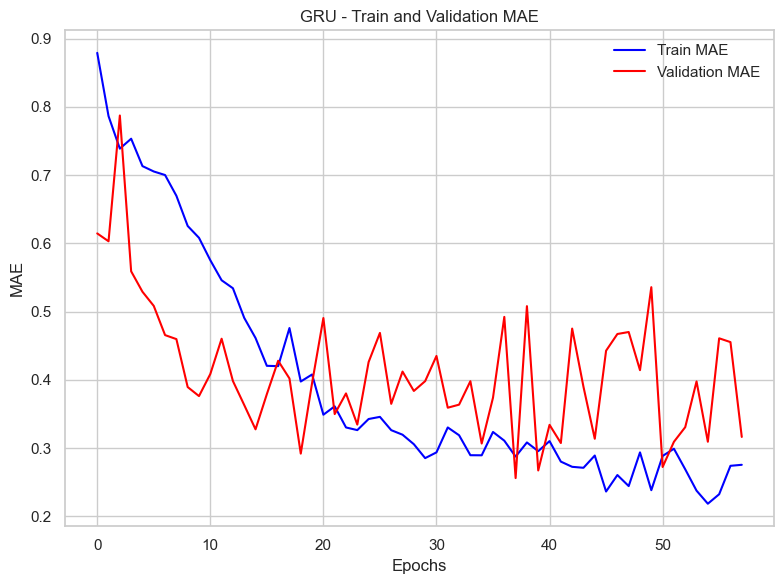

In [91]:
plot_mae_per_model(histories)

In [92]:
import numpy as np

# Assuming monthly_data is your DataFrame with 'ddd_demand' column
average_monthly_demand = monthly_data['ddd_demand'].mean()
print(f"Average Monthly Demand: {average_monthly_demand:,.2f}")

Average Monthly Demand: 1.39


In [93]:
import numpy as np

def create_test_sequences(data, sequence_length=12, delay=1, test_start=64, test_end=87):
    """Manually creates test sequences from normalized data"""
    X_test = []
    y_test = []
    
    for i in range(test_start, test_end):
        X_test.append(data[i:i+sequence_length, :-1])  # Features
        y_test.append(data[i+sequence_length+delay-1, -1])  # Target
    
    return np.array(X_test), np.array(y_test)

def evaluate_models(models, X_test, y_test, target_std, target_mean):
    """Evaluates models and returns results with denormalized values"""
    results = {}
    
    for name, model in models.items():
        try:
            # Get predictions
            y_pred = model.predict(X_test, verbose=0).squeeze()
            
            # Calculate MAE (normalized)
            normalized_mae = np.mean(np.abs(y_test - y_pred))
            
            # Denormalize
            denormalized_mae = normalized_mae * target_std
            percentage = (denormalized_mae / target_mean) * 100
            
            results[name] = {
                'normalized': normalized_mae,
                'original': denormalized_mae,
                'percentage': percentage
            }
            
            # Print immediate feedback
            print(
                f"{name.ljust(8)}: "
                f"NormMAE={normalized_mae:.4f} | "
                f"OriginalMAE={denormalized_mae:,.2f} | "
                f"{percentage:.1f}% of avg"
            )
            
        except Exception as e:
            print(f"Error evaluating {name}: {str(e)}")
            results[name] = None
    
    return results

# 1. Create test sequences
X_test, y_test = create_test_sequences(data_values_normalized)

# 2. Evaluate all models
final_results = evaluate_models(
    models={
        'Dense': dense_model,
        'LSTM': lstm_model,
        'GRU': gru_model
    },
    X_test=X_test,
    y_test=y_test,
    target_std=std[-1],  # Standard deviation of target
    target_mean=mean[-1]  # Mean of target
)

# 3. Print formatted summary
if final_results:
    print("\n=== Final Results ===")
    for name, metrics in sorted(final_results.items(), 
                              key=lambda x: x[1]['original'] if x[1] else float('inf')):
        if metrics:
            print(
                f"{name.ljust(8)}: "
                f"{metrics['original']:,.2f} (units) | "
                f"{metrics['percentage']:.1f}%"
            )

Dense   : NormMAE=0.6129 | OriginalMAE=0.16 | 11.4% of avg
LSTM    : NormMAE=0.7604 | OriginalMAE=0.20 | 14.1% of avg
GRU     : NormMAE=0.4822 | OriginalMAE=0.13 | 9.0% of avg

=== Final Results ===
GRU     : 0.13 (units) | 9.0%
Dense   : 0.16 (units) | 11.4%
LSTM    : 0.20 (units) | 14.1%


In [94]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# ====================
# 1. MODEL BUILDING FUNCTIONS (FUNCTIONAL API)
# ====================

def build_dense_model(input_shape):
    """Basic dense model using Functional API"""
    inputs = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0] * input_shape[1],))(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

def build_lstm_model(input_shape):
    """LSTM model using Functional API"""
    inputs = keras.Input(shape=input_shape)
    x = layers.LSTM(128)(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

def build_gru_model(input_shape):
    """GRU model using Functional API"""
    inputs = keras.Input(shape=input_shape)
    x = layers.GRU(256)(inputs)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

def build_transformer_model(input_shape, head_size=32, num_heads=4, ff_dim=64, num_transformer_blocks=2):
    """Transformer model with attention"""
    inputs = keras.Input(shape=input_shape)
    
    # Positional encoding
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    
    for _ in range(num_transformer_blocks):
        # Multi-head self-attention
        attention_output = layers.MultiHeadAttention(
            key_dim=head_size, 
            num_heads=num_heads,
            dropout=0.2
        )(x, x)
        
        # Skip connection
        x = layers.Add()([x, attention_output])
        x = layers.LayerNormalization(epsilon=1e-6)(x)
        
        # Feed-forward network
        ffn = layers.Dense(ff_dim, activation="relu")(x)
        ffn = layers.Dense(input_shape[-1])(ffn)
        x = layers.Add()([x, ffn])
        x = layers.LayerNormalization(epsilon=1e-6)(x)
    
    # Global average pooling and output
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(1)(x)
    return keras.Model(inputs, outputs)

# ====================
# 2. TRAINING PIPELINE
# ====================

def compile_and_train(model, train_dataset, val_dataset, name, epochs=500, patience=20):
    """Universal training function"""
    model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])
    print(f"\nTraining {name}...")
    
    callbacks = [
        keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ]
    
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=callbacks,
        verbose=0
    )
    return model, history

def train_xgboost(X_train, y_train, X_val, y_val):
    """XGBoost training with early stopping"""
    model = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        objective='reg:squarederror',
        early_stopping_rounds=20,
        eval_metric='mae'
    )
    
    print("\nTraining XGBoost...")
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=1
    )
    return model

# ====================
# 3. DATA PREPARATION
# ====================

def prepare_xgboost_data(dataset):
    """Convert TF dataset to numpy arrays for XGBoost"""
    X, y = [], []
    for batch in dataset:
        features, targets = batch
        # Reshape sequences into feature vectors
        X.append(features.numpy().reshape(features.shape[0], -1))
        y.append(targets.numpy())
    return np.concatenate(X), np.concatenate(y)

def create_test_sequences(data, sequence_length=12, delay=1, test_start=39, test_end=42):
    """Creates test sequences from normalized data"""
    X_test = []
    y_test = []
    
    for i in range(test_start, test_end):
        X_test.append(data[i:i+sequence_length, :-1])  # Features
        y_test.append(data[i+sequence_length+delay-1, -1])  # Target
    
    return np.array(X_test), np.array(y_test)

# ====================
# 4. EVALUATION
# ====================

def evaluate_models(models, X_test, y_test, target_std, target_mean):
    """Evaluates all models with denormalized metrics"""
    results = {}
    
    for name, model in models.items():
        try:
            if name == 'XGBoost':
                # Reshape test data for XGBoost
                X_test_reshaped = X_test.reshape(X_test.shape[0], -1)
                y_pred = model.predict(X_test_reshaped)
            else:
                y_pred = model.predict(X_test, verbose=0).squeeze()
            
            normalized_mae = mean_absolute_error(y_test, y_pred)
            denormalized_mae = normalized_mae * target_std
            percentage = (denormalized_mae / target_mean) * 100
            
            results[name] = {
                'normalized': normalized_mae,
                'original': denormalized_mae,
                'percentage': percentage
            }
            
            print(f"{name.ljust(12)}: NormMAE={normalized_mae:.4f} | "
                  f"OriginalMAE={denormalized_mae:,.2f} | {percentage:.1f}% of avg")
            
        except Exception as e:
            print(f"Error evaluating {name}: {str(e)}")
            results[name] = None
    
    return results

def plot_mae_per_model(histories):
    """Plots training curves for all models"""
    for name, history in histories.items():
        if not isinstance(history, dict):  # Skip XGBoost which doesn't have history
            continue
            
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['mae'], label='Train MAE', color='blue')
        plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
        plt.title(f'{name} - Train and Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()
        plt.tight_layout()
        plt.show()

# ====================
# 5. MAIN EXECUTION
# ====================

def main():
    # Get input shape from dataset
    input_shape = next(iter(train_dataset))[0].shape[1:]
    
    # Build all models
    models = {
        'Dense': build_dense_model(input_shape),
        'LSTM': build_lstm_model(input_shape),
        'GRU': build_gru_model(input_shape),
        'Transformer': build_transformer_model(input_shape)
    }
    
    # Train neural models
    histories = {}
    for name, model in models.items():
        models[name], histories[name] = compile_and_train(
            model, train_dataset, val_dataset, name
        )
    
    # Prepare and train XGBoost
    X_train, y_train = prepare_xgboost_data(train_dataset)
    X_val, y_val = prepare_xgboost_data(val_dataset)
    xgb_model = train_xgboost(X_train, y_train, X_val, y_val)
    models['XGBoost'] = xgb_model
    
    # Plot training curves
    plot_mae_per_model(histories)
    
    # Evaluate all models
    X_test, y_test = create_test_sequences(data_values_normalized)
    final_results = evaluate_models(
        models=models,
        X_test=X_test,
        y_test=y_test,
        target_std=std[-1],
        target_mean=mean[-1]
    )
    
    # Print final results
    print("\n=== Final Results ===")
    for name, metrics in sorted(final_results.items(), 
                              key=lambda x: x[1]['original'] if x[1] else float('inf')):
        if metrics:
            print(f"{name.ljust(12)}: {metrics['original']:,.2f} (units) | {metrics['percentage']:.1f}%")

if __name__ == "__main__":
    main()


Training Dense...

Training LSTM...

Training GRU...

Training Transformer...

Training XGBoost...
[0]	validation_0-mae:0.69725
[1]	validation_0-mae:0.69445
[2]	validation_0-mae:0.69168
[3]	validation_0-mae:0.68882
[4]	validation_0-mae:0.68599
[5]	validation_0-mae:0.68330
[6]	validation_0-mae:0.67878
[7]	validation_0-mae:0.67602
[8]	validation_0-mae:0.67329
[9]	validation_0-mae:0.67069
[10]	validation_0-mae:0.66770
[11]	validation_0-mae:0.66474
[12]	validation_0-mae:0.66180
[13]	validation_0-mae:0.65732
[14]	validation_0-mae:0.65443
[15]	validation_0-mae:0.65157
[16]	validation_0-mae:0.64873
[17]	validation_0-mae:0.64592
[18]	validation_0-mae:0.64323
[19]	validation_0-mae:0.63884
[20]	validation_0-mae:0.63610
[21]	validation_0-mae:0.63338
[22]	validation_0-mae:0.63078
[23]	validation_0-mae:0.62811
[24]	validation_0-mae:0.62546
[25]	validation_0-mae:0.62127
[26]	validation_0-mae:0.61895
[27]	validation_0-mae:0.61637
[28]	validation_0-mae:0.61382
[29]	validation_0-mae:0.61119
[30]	valid

### t+1, t+2 and t+3

### Hyper Parameter Tunning

In [95]:
raw_data = monthly_data
raw_data.head()

,year,month,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
date,,,,,,,,
2017-01-01,2017,1,0.864790,31.48,18.21,45.61,1566.1,40921.04
2017-02-01,2017,2,1.177077,29.90,18.73,59.40,5688.3,36217.44
2017-03-01,2017,3,1.478589,29.52,18.73,65.59,7772.2,40075.80
2017-04-01,2017,4,1.642890,28.54,18.91,69.17,13211.3,38181.34
2017-05-01,2017,5,1.553777,26.65,18.17,76.58,13682.8,39728.48


In [96]:
feature_cols = [
    'avg_temp_max', 'avg_temp_min', 'avg_humidity',
    'total_precipitation', 'total_sunshine_hours', 'ddd_demand'
]

selected_data = raw_data[feature_cols]
data_values = selected_data.values.astype('float32')
print("Column order in selected_data:")
print(selected_data.columns)


Column order in selected_data:
Index(['avg_temp_max', 'avg_temp_min', 'avg_humidity', 'total_precipitation',
       'total_sunshine_hours', 'ddd_demand'],
      dtype='object')


In [97]:
num_samples = len(data_values)
num_train = int(0.60 * num_samples)
num_val = int(0.20 * num_samples)
num_test = num_samples - num_train - num_val

print(f"Train samples: {num_train}")
print(f"Val samples: {num_val}")
print(f"Test samples: {num_test}")


Train samples: 59
Val samples: 19
Test samples: 21


In [98]:
mean = data_values[:num_train].mean(axis=0)
std = data_values[:num_train].std(axis=0)
std[std < 1e-10] = 1.0
data_values_normalized = (data_values - mean) / std


In [99]:
sequence_length = 12
delays = [1, 2, 3]  # Predict next 3 months
max_delay = max(delays)
batch_size = 32

# Features (all except last column)
features = data_values_normalized[:, :-1]
# Target: ddd_demand (last column)
ddd_demand = data_values_normalized[:, -1]

# Build multi-step target array
multi_targets = []
for i in range(len(ddd_demand) - sequence_length - max_delay + 1):
    multi_targets.append([
        ddd_demand[i + sequence_length + d - 1] for d in delays
    ])
multi_targets = np.array(multi_targets)


In [100]:
from tensorflow import keras

def create_ts_dataset(features, targets, start_idx, end_idx):
    return keras.utils.timeseries_dataset_from_array(
        data=features,
        targets=targets,
        sampling_rate=1,
        sequence_length=sequence_length,
        start_index=start_idx,
        end_index=end_idx,
        shuffle=True,
        batch_size=batch_size
    )

total_sequences = len(multi_targets)
train_sequences = int(0.60 * total_sequences)
val_sequences = int(0.20 * total_sequences)
test_sequences = total_sequences - train_sequences - val_sequences

train_dataset = create_ts_dataset(
    features, multi_targets,
    start_idx=0,
    end_idx=train_sequences
)

val_dataset = create_ts_dataset(
    features, multi_targets,
    start_idx=train_sequences,
    end_idx=train_sequences + val_sequences
)

test_dataset = create_ts_dataset(
    features, multi_targets,
    start_idx=train_sequences + val_sequences,
    end_idx=None
)


In [116]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
def dense_model(input_shape):
    """Dense model updated for 3-step forecasting"""
    inputs = keras.Input(shape=input_shape)
    x = layers.Reshape((input_shape[0] * input_shape[1],))(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(3)(x)  # Output t+1, t+2, t+3
    return keras.Model(inputs, outputs)
def lstm_model(input_shape):
    """LSTM model updated for 3-step forecasting"""
    inputs = keras.Input(shape=input_shape)
    x = layers.LSTM(128)(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(3)(x)
    return keras.Model(inputs, outputs)
def gru_model(input_shape):
    """GRU model updated for 3-step forecasting"""
    inputs = keras.Input(shape=input_shape)
    x = layers.GRU(256)(inputs)
    outputs = layers.Dense(3)(x)
    return keras.Model(inputs, outputs)

def transformer_model(input_shape, head_size=32, num_heads=4, ff_dim=64, num_transformer_blocks=2):
    """Transformer model updated for 3-step forecasting"""
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)

    for _ in range(num_transformer_blocks):
        attention_output = layers.MultiHeadAttention(
            key_dim=head_size, 
            num_heads=num_heads,
            dropout=0.2
        )(x, x)
        
        x = layers.Add()([x, attention_output])
        x = layers.LayerNormalization(epsilon=1e-6)(x)

        ffn = layers.Dense(ff_dim, activation="relu")(x)
        ffn = layers.Dense(input_shape[-1])(ffn)
        x = layers.Add()([x, ffn])
        x = layers.LayerNormalization(epsilon=1e-6)(x)

    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(3)(x)
    return keras.Model(inputs, outputs)


In [117]:
# ====================
# 2. TRAINING PIPELINE
# ====================

def compile_and_train(model, train_dataset, val_dataset, name, epochs=500, patience=20):
    """Universal training function"""
    model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])
    print(f"\nTraining {name}...")
    
    callbacks = [
        keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ]
    
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        callbacks=callbacks,
        verbose=0
    )
    return model, history

def train_xgboost(X_train, y_train, X_val, y_val):
    """XGBoost training with early stopping"""
    model = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        objective='reg:squarederror',
        early_stopping_rounds=20,
        eval_metric='mae'
    )
    
    print("\nTraining XGBoost...")
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=1
    )
    return model

In [118]:
def train_xgboost(X_train, y_train, X_val, y_val):
    models = []
    for i in range(y_train.shape[1]):
        model = XGBRegressor(
            n_estimators=1000,
            learning_rate=0.01,
            objective='reg:squarederror',
            early_stopping_rounds=20,
            eval_metric='mae'
        )
        model.fit(
            X_train, y_train[:, i],
            eval_set=[(X_val, y_val[:, i])],
            verbose=0
        )
        models.append(model)
    return models


In [119]:
def create_test_sequences(data, sequence_length=12, delays=[1, 2, 3]):
    X_test, y_test = [], []
    max_delay = max(delays)
    for i in range(len(data) - sequence_length - max_delay + 1):
        X_test.append(data[i:i+sequence_length, :-1])
        y_test.append([data[i+sequence_length + d - 1, -1] for d in delays])
    return np.array(X_test), np.array(y_test)


In [120]:
def evaluate_models(models, X_test, y_test, target_std, target_mean):
    results = {}
    for name, model in models.items():
        try:
            if name == 'XGBoost':
                y_preds = []
                for i, m in enumerate(model):
                    y_preds.append(m.predict(X_test.reshape(X_test.shape[0], -1)))
                y_pred = np.stack(y_preds, axis=1)
            else:
                y_pred = model.predict(X_test, verbose=0)

            maes = []
            for i in range(y_test.shape[1]):
                mae_i = mean_absolute_error(y_test[:, i], y_pred[:, i])
                denorm_mae = mae_i * target_std
                percentage = (denorm_mae / target_mean) * 100
                maes.append((mae_i, denorm_mae, percentage))

            results[name] = maes

            print(f"\n{name} MAE per horizon:")
            for i, (mae_norm, mae_orig, perc) in enumerate(maes):
                print(f"t+{i+1}: NormMAE={mae_norm:.4f} | Original={mae_orig:,.2f} | {perc:.1f}% of mean")

        except Exception as e:
            print(f"Error evaluating {name}: {e}")
            results[name] = None
    return results


In [133]:
def main():
    input_shape = next(iter(train_dataset))[0].shape[1:]
    models = {
        'dense': dense_model(input_shape),
        'lSTM': lstm_model(input_shape),
        'gRU': gru_model(input_shape),
        'transformer': transformer_model(input_shape)
    }

    histories = {}
    for name, model in models.items():
        models[name], histories[name] = compile_and_train(
            model, train_dataset, val_dataset, name
        )

    X_train, y_train = prepare_xgboost_data(train_dataset)
    X_val, y_val = prepare_xgboost_data(val_dataset)
    xgb_models = train_xgboost(X_train, y_train, X_val, y_val)
    models['XGBoost'] = xgb_models

    plot_mae_per_model(histories)

    X_test, y_test = create_test_sequences(data_values_normalized)
    evaluate_models(models, X_test, y_test, target_std=std[-1], target_mean=mean[-1])

# === STEP 12: Run the Full Pipeline ===
    return models
models = main()



Training dense...

Training lSTM...

Training gRU...

Training transformer...

dense MAE per horizon:
t+1: NormMAE=0.3700 | Original=0.10 | 6.9% of mean
t+2: NormMAE=0.4343 | Original=0.11 | 8.1% of mean
t+3: NormMAE=0.4593 | Original=0.12 | 8.5% of mean

lSTM MAE per horizon:
t+1: NormMAE=0.6080 | Original=0.16 | 11.3% of mean
t+2: NormMAE=0.5464 | Original=0.14 | 10.2% of mean
t+3: NormMAE=0.5608 | Original=0.15 | 10.4% of mean

gRU MAE per horizon:
t+1: NormMAE=0.4044 | Original=0.10 | 7.5% of mean
t+2: NormMAE=0.4117 | Original=0.11 | 7.6% of mean
t+3: NormMAE=0.4117 | Original=0.11 | 7.6% of mean

transformer MAE per horizon:
t+1: NormMAE=0.9232 | Original=0.24 | 17.2% of mean
t+2: NormMAE=0.9664 | Original=0.25 | 18.0% of mean
t+3: NormMAE=0.9353 | Original=0.24 | 17.4% of mean

XGBoost MAE per horizon:
t+1: NormMAE=0.4954 | Original=0.13 | 9.2% of mean
t+2: NormMAE=0.4686 | Original=0.12 | 8.7% of mean
t+3: NormMAE=0.5759 | Original=0.15 | 10.7% of mean


In [134]:
# Create models directory
os.makedirs("models", exist_ok=True)

# Save models - FIXED XGBoost saving
for name, model in models.items():
    if name == 'XGBoost':
        # Ensure we have an XGBoost model object
        if hasattr(model, 'save_model'):
            model.save_model(f"models/{name}_model.json")  # Preferred XGBoost format
        else:
            # Fallback if it's not a proper XGBoost model
            import pickle
            with open(f"models/{name}_model.pkl", 'wb') as f:
                pickle.dump(model, f)
    else:
        # Keras models
        model.save(f"models/{name}_model.keras")

In [138]:
import tensorflow as tf
import os
import pickle
import xgboost as xgb
import numpy as np

# Define model names and paths
model_names = ['dense', 'gRU', 'lSTM', 'transformer']  # ✅ Added XGBoost
models = {}

# Load models and check output shape
for name in model_names:
    if name == 'XGBoost':
        model_path = os.path.join("models", f"{name}_model.pkl")
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
        models[name] = model
        # XGBoost doesn't have output_shape, so we check input features
        if hasattr(model, 'n_features_in_'):
            print(f"✅ Loaded {name} model. Input features: {model.n_features_in_}")
        else:
            print(f"✅ Loaded {name} model (XGBoost). Input shape must match training data.")
    else:
        model_path = os.path.join("models", f"{name}_model.keras")
        model = tf.keras.models.load_model(model_path)
        models[name] = model
        print(f"✅ Loaded {name} model. Output shape: {model.output_shape}")

✅ Loaded dense model. Output shape: (None, 3)
✅ Loaded gRU model. Output shape: (None, 3)
✅ Loaded lSTM model. Output shape: (None, 3)
✅ Loaded transformer model. Output shape: (None, 3)


In [147]:
selected_data.head()

,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours,ddd_demand
date,,,,,,
2017-01-01,31.48,18.21,45.61,1566.1,40921.04,0.864790
2017-02-01,29.90,18.73,59.40,5688.3,36217.44,1.177077
2017-03-01,29.52,18.73,65.59,7772.2,40075.80,1.478589
2017-04-01,28.54,18.91,69.17,13211.3,38181.34,1.642890
2017-05-01,26.65,18.17,76.58,13682.8,39728.48,1.553777


In [140]:
import numpy as np
import pandas as pd
from tensorflow import keras

# === Step 1: Load your selected_data dataframe ===
# Assumes 'selected_data' already available with required columns
# ['avg_temp_max', 'avg_temp_min', 'avg_humidity', 'total_precipitation', 'total_sunshine_hours', 'ddd_demand']

# === Step 2: Extract last 12 months as input (Apr 2024 – Mar 2025) ===
input_window = selected_data.iloc[-12:].copy()
input_raw = input_window.values.astype('float32')

# === Step 3: Apply normalization (use training mean/std) ===
input_normalized = (input_raw - mean) / std

# === Step 4: Drop 'ddd_demand' to get input features only ===
input_features = input_normalized[:, :-1]  # shape: (12, 5)
input_keras = input_features.reshape(1, 12, 5)  # shape: (1, 12, 5)

# === Step 5: Load models ===
model_paths = {
    'Dense': './models/Dense_model.keras',
    'GRU': './models/GRU_model.keras',
    'LSTM': './models/LSTM_model.keras'
}

models = {}
for name, path in model_paths.items():
    try:
        models[name] = keras.models.load_model(path)
        print(f"Loaded model: {name}")
    except Exception as e:
        print(f"Failed to load {name} model from {path}: {e}")

# === Step 6: Predict and Denormalize ===
ddd_mean = mean[-1]
ddd_std = std[-1]

for name, model in models.items():
    try:
        y_pred = model.predict(input_keras, verbose=0).flatten()  # shape (3,)
        y_pred_orig = y_pred * ddd_std + ddd_mean

        print(f"\n{name} Predictions (ddd_demand):")
        for i, month in enumerate(["April 2025", "May 2025", "June 2025"]):
            print(f"{month}: {y_pred_orig[i]:.3f}")
    except Exception as e:
        print(f"Error during prediction with {name}: {e}")


Loaded model: Dense
Loaded model: GRU
Loaded model: LSTM

Dense Predictions (ddd_demand):
April 2025: 1.662
May 2025: 1.645
June 2025: 1.071

GRU Predictions (ddd_demand):
April 2025: 1.820
May 2025: 1.739
June 2025: 1.409

LSTM Predictions (ddd_demand):
April 2025: 1.888
May 2025: 1.703
June 2025: 1.327


,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours,ddd_demand
date,,,,,,
2025-01-01,30.65,18.14,53.14,2357.5,39774.64,0.907231
2025-02-01,32.57,19.18,47.96,1578.2,36448.93,0.971073
2025-03-01,30.17,19.27,63.26,14585.4,37039.12,1.733253


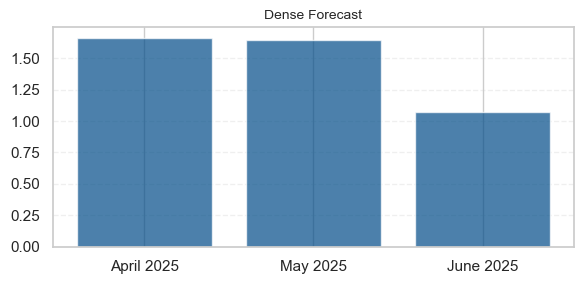

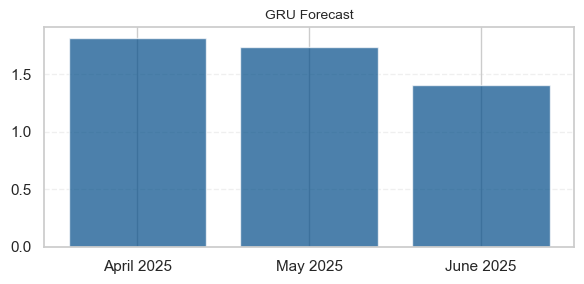

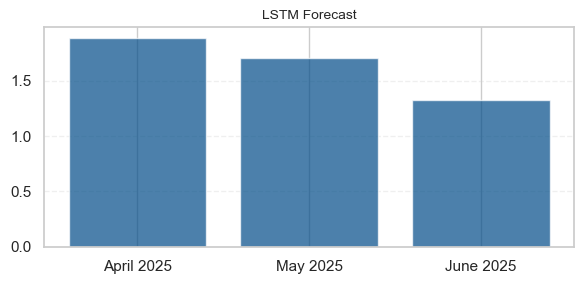

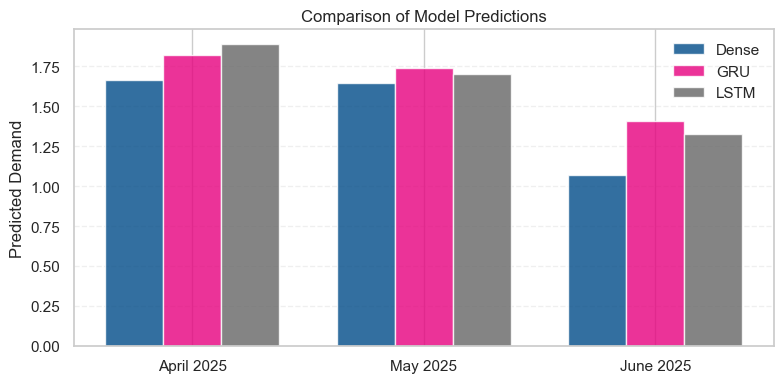

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML
from tensorflow import keras

# OECD color palette
OECD_BLUE = '#004b88'
OECD_LIGHT_BLUE = '#e6f0f9'
OECD_RED = '#e6007e'
OECD_GRAY = '#666666'

# === Custom CSS for OECD styling ===
css = f"""
<style>
    .oecd-container {{
        font-family: 'Arial', sans-serif;
        max-width: 900px;
        margin: 20px auto;
        padding: 20px;
        background-color: white;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        border-left: 5px solid {OECD_BLUE};
    }}
    .oecd-header {{
        color: {OECD_BLUE};
        border-bottom: 2px solid {OECD_LIGHT_BLUE};
        padding-bottom: 10px;
        margin-bottom: 20px;
    }}
    .oecd-card {{
        background-color: {OECD_LIGHT_BLUE};
        padding: 15px;
        margin-bottom: 20px;
        border-radius: 4px;
    }}
    .oecd-model-card {{
        background-color: white;
        border-left: 3px solid {OECD_BLUE};
        padding: 15px;
        margin-bottom: 15px;
        box-shadow: 0 1px 3px rgba(0,0,0,0.1);
    }}
    .oecd-highlight {{
        font-weight: bold;
        color: {OECD_BLUE};
    }}
    .oecd-plot {{
        margin-top: 20px;
    }}
    .oecd-footer {{
        margin-top: 30px;
        font-size: 0.8em;
        color: {OECD_GRAY};
        text-align: center;
        border-top: 1px solid {OECD_LIGHT_BLUE};
        padding-top: 10px;
    }}
</style>
"""
display(HTML(css))

# === Create Dashboard Layout ===
def create_oecd_dashboard(selected_data, models, mean, std):
    # Prepare data
    input_window = selected_data.iloc[-12:].copy()
    input_raw = input_window.values.astype('float32')
    input_normalized = (input_raw - mean) / std
    input_features = input_normalized[:, :-1]
    input_keras = input_features.reshape(1, 12, 5)
    ddd_mean = mean[-1]
    ddd_std = std[-1]
    
    # Header
    display(HTML(
        f"""
        <div class='oecd-container'>
            <div class='oecd-header'>
                <h2>OECD Energy Demand Forecast Dashboard</h2>
                <p>Three-month ahead predictions for electricity demand (ddd_demand)</p>
            </div>
            
            <div class='oecd-card'>
                <h3>Input Data Overview</h3>
                <p>Using last 12 months of data (April 2024 - March 2025) for forecasting:</p>
                {input_window.tail(3).to_html(classes='table table-striped')}
            </div>
        """
    ))
    
    # Model predictions
    predictions = {}
    for name, model in models.items():
        try:
            y_pred = model.predict(input_keras, verbose=0).flatten()
            y_pred_orig = y_pred * ddd_std + ddd_mean
            predictions[name] = {
                'April 2025': y_pred_orig[0],
                'May 2025': y_pred_orig[1],
                'June 2025': y_pred_orig[2]
            }
        except Exception as e:
            print(f"Error during prediction with {name}: {e}")
    
    # Create prediction cards
    for name, preds in predictions.items():
        card_html = f"""
        <div class='oecd-model-card'>
            <h4>{name} Model Predictions</h4>
            <div style='display: flex; justify-content: space-between;'>
                <div>
                    <p><span class='oecd-highlight'>April 2025:</span> {preds['April 2025']:.3f}</p>
                    <p><span class='oecd-highlight'>May 2025:</span> {preds['May 2025']:.3f}</p>
                    <p><span class='oecd-highlight'>June 2025:</span> {preds['June 2025']:.3f}</p>
                </div>
                <div style='width: 60%;'>
        """
        
        # Add plot to card
        fig, ax = plt.subplots(figsize=(6, 3))
        months = list(preds.keys())
        values = list(preds.values())
        ax.bar(months, values, color=OECD_BLUE, alpha=0.7)
        ax.set_title(f'{name} Forecast', fontsize=10)
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        plt.tight_layout()
        
        display(HTML(card_html))
        plt.show()
        display(HTML("</div></div>"))
    
    # Comparison plot
    display(HTML("<div class='oecd-card'><h3>Model Comparison</h3>"))
    fig, ax = plt.subplots(figsize=(8, 4))
    width = 0.25
    x = np.arange(3)
    
    for i, (name, preds) in enumerate(predictions.items()):
        ax.bar(x + i*width, list(preds.values()), width, 
               label=name, alpha=0.8, color=[OECD_BLUE, OECD_RED, OECD_GRAY][i])
    
    ax.set_xticks(x + width)
    ax.set_xticklabels(['April 2025', 'May 2025', 'June 2025'])
    ax.set_ylabel('Predicted Demand')
    ax.set_title('Comparison of Model Predictions')
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Footer
    display(HTML(
        """
        <div class='oecd-footer'>
            <p>Anti-Malarial Energy Demand Forecasting Dashboard</p>
            <p>Data updated: """ + pd.Timestamp.now().strftime('%Y-%m-%d') + """</p>
        </div>
        </div>
        """
    ))

# === Load Models ===
model_paths = {
    'Dense': './models/Dense_model.keras',
    'GRU': './models/GRU_model.keras',
    'LSTM': './models/LSTM_model.keras'
}

models = {}
for name, path in model_paths.items():
    try:
        models[name] = keras.models.load_model(path)
    except Exception as e:
        print(f"Failed to load {name} model from {path}: {e}")

# === Run Dashboard ===
create_oecd_dashboard(selected_data, models, mean, std)

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from tensorflow import keras

# OECD color palette
OECD_BLUE = '#004b88'
OECD_LIGHT_BLUE = '#e6f0f9'
OECD_RED = '#e6007e'
OECD_GRAY = '#666666'
OECD_GREEN = '#00a189'

# === Custom CSS for OECD styling ===
css = f"""
<style>
    .oecd-container {{
        font-family: 'Arial', sans-serif;
        max-width: 1000px;
        margin: 20px auto;
        padding: 20px;
        background-color: white;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        border-left: 5px solid {OECD_BLUE};
    }}
    .oecd-header {{
        color: {OECD_BLUE};
        border-bottom: 2px solid {OECD_LIGHT_BLUE};
        padding-bottom: 10px;
        margin-bottom: 20px;
    }}
    .oecd-card {{
        background-color: {OECD_LIGHT_BLUE};
        padding: 15px;
        margin-bottom: 15px;
        border-radius: 4px;
    }}
    .oecd-model-card {{
        background-color: white;
        border-left: 3px solid {OECD_BLUE};
        padding: 15px;
        margin: 10px;
        box-shadow: 0 1px 3px rgba(0,0,0,0.1);
        height: 100%;
    }}
    .oecd-highlight {{
        font-weight: bold;
        color: {OECD_BLUE};
    }}
    .oecd-plot-container {{
        display: flex;
        flex-wrap: wrap;
        justify-content: space-between;
        margin-top: 20px;
    }}
    .oecd-plot-item {{
        flex: 0 0 48%;
        margin-bottom: 20px;
    }}
    .oecd-footer {{
        margin-top: 30px;
        font-size: 0.8em;
        color: {OECD_GRAY};
        text-align: center;
        border-top: 1px solid {OECD_LIGHT_BLUE};
        padding-top: 10px;
    }}
    .oecd-tab-content {{
        padding: 15px 0;
    }}
    .oecd-grid {{
        display: grid;
        grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
        gap: 15px;
        margin-top: 15px;
    }}
    .oecd-data-table {{
        max-height: 400px;
        overflow-y: auto;
        margin: 10px 0;
    }}
    table {{
        width: 100%;
        border-collapse: collapse;
    }}
    th {{
        background-color: {OECD_BLUE};
        color: white;
        padding: 8px;
        text-align: left;
    }}
    td {{
        padding: 6px;
        border-bottom: 1px solid {OECD_LIGHT_BLUE};
    }}
    tr:nth-child(even) {{
        background-color: {OECD_LIGHT_BLUE};
    }}
</style>
"""
display(HTML(css))

# === Create Dashboard Layout with Tabs ===
def create_enhanced_dashboard(selected_data, models, mean, std):
    # Prepare data
    input_window = selected_data.iloc[-12:].copy()
    input_raw = input_window.values.astype('float32')
    input_normalized = (input_raw - mean) / std
    input_features = input_normalized[:, :-1]
    input_keras = input_features.reshape(1, 12, 5)
    ddd_mean = mean[-1]
    ddd_std = std[-1]
    
    # Get predictions
    predictions = {}
    for name, model in models.items():
        try:
            y_pred = model.predict(input_keras, verbose=0).flatten()
            y_pred_orig = y_pred * ddd_std + ddd_mean
            predictions[name] = {
                'April 2025': y_pred_orig[0],
                'May 2025': y_pred_orig[1],
                'June 2025': y_pred_orig[2]
            }
        except Exception as e:
            print(f"Error during prediction with {name}: {e}")
    
    # Create tabs
    tab = widgets.Tab()
    tab.children = [
        widgets.Output(),  # Tab 1: Input Data
        widgets.Output(),  # Tab 2: Model Predictions
        widgets.Output()   # Tab 3: Model Comparison
    ]
    tab.titles = ["Input Data", "Model Results", "Comparative Analysis"]
    display(tab)
    
    # Tab 1: Input Data
    with tab.children[0]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Input Data Used for Forecasting</h2>
                    <p>Last 12 months of data (April 2024 - March 2025)</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Complete Input Dataset</h3>
                    <div class='oecd-data-table'>
                        {input_window.to_html(classes='table')}
                    </div>
                </div>
                
                <div class='oecd-card'>
                    <h3>Key Statistics</h3>
                    <div class='oecd-grid'>
                        <div class='oecd-model-card'>
                            <h4>Temperature Metrics</h4>
                            <p>Max Temp Avg: {input_window['avg_temp_max'].mean():.1f}°C</p>
                            <p>Min Temp Avg: {input_window['avg_temp_min'].mean():.1f}°C</p>
                        </div>
                        <div class='oecd-model-card'>
                            <h4>Environmental Factors</h4>
                            <p>Humidity Avg: {input_window['avg_humidity'].mean():.1f}%</p>
                            <p>Precipitation Total: {input_window['total_precipitation'].sum():.1f}mm</p>
                        </div>
                        <div class='oecd-model-card'>
                            <h4>Energy Metrics</h4>
                            <p>Sunshine Hours: {input_window['total_sunshine_hours'].sum():.0f}</p>
                            <p>Current Demand: {input_window['ddd_demand'].iloc[-1]:.3f}</p>
                        </div>
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Data snapshot as of {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}</p>
                </div>
            </div>
            """
        ))
    
    # Tab 2: Model Predictions
    with tab.children[1]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Model Predictions</h2>
                    <p>Three-month ahead forecasts for electricity demand</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Individual Model Results</h3>
                    <div class='oecd-grid'>
            """
        ))
        
        # Create model cards in grid layout
        for name, preds in predictions.items():
            # Create plot
            fig, ax = plt.subplots(figsize=(5, 3))
            months = list(preds.keys())
            values = list(preds.values())
            
            bars = ax.bar(months, values, color=OECD_BLUE, alpha=0.7)
            ax.set_title(f'{name} Forecast', fontsize=10)
            ax.set_ylabel('Demand')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.3f}',
                        ha='center', va='bottom', fontsize=8)
            
            plt.tight_layout()
            
            # Display card
            display(HTML(
                f"""
                <div class='oecd-model-card'>
                    <h4>{name} Model</h4>
                    <div style='display: flex; flex-direction: column; height: 90%;'>
                        <div style='flex: 1;'>
                """
            ))
            plt.show()
            display(HTML(
                f"""
                        </div>
                        <div style='margin-top: 10px;'>
                            <p><span class='oecd-highlight'>April 2025:</span> {preds['April 2025']:.3f}</p>
                            <p><span class='oecd-highlight'>May 2025:</span> {preds['May 2025']:.3f}</p>
                            <p><span class='oecd-highlight'>June 2025:</span> {preds['June 2025']:.3f}</p>
                        </div>
                    </div>
                </div>
                """
            ))
        
        display(HTML(
                    """
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Model predictions generated on """ + pd.Timestamp.now().strftime('%Y-%m-%d %H:%M') + """</p>
                </div>
            </div>
            """
        ))
    
    # Tab 3: Model Comparison
    with tab.children[2]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Comparative Analysis</h2>
                    <p>Comparison of model predictions for April-June 2025</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Side-by-Side Comparison</h3>
                    <div class='oecd-plot-container'>
                        <div class='oecd-plot-item'>
            """
        ))
        
        # Comparison bar chart
        fig, ax = plt.subplots(figsize=(8, 4))
        width = 0.2
        x = np.arange(3)
        colors = [OECD_BLUE, OECD_RED, OECD_GREEN, OECD_GRAY]
        
        for i, (name, preds) in enumerate(predictions.items()):
            ax.bar(x + i*width, list(preds.values()), width, 
                   label=name, alpha=0.8, color=colors[i])
        
        ax.set_xticks(x + width)
        ax.set_xticklabels(['April 2025', 'May 2025', 'June 2025'])
        ax.set_ylabel('Predicted Demand')
        ax.set_title('Model Comparison')
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        display(HTML(
            """
                        </div>
                        <div class='oecd-plot-item'>
            """
        ))
        
        # Difference heatmap
        if len(predictions) > 1:
            model_names = list(predictions.keys())
            months = ['April 2025', 'May 2025', 'June 2025']
            diff_matrix = np.zeros((len(months), len(model_names)))
            
            for i, month in enumerate(months):
                values = [predictions[model][month] for model in model_names]
                diff_matrix[i,:] = values
            
            fig, ax = plt.subplots(figsize=(8, 3))
            cax = ax.matshow(diff_matrix, cmap='Blues')
            
            ax.set_xticks(range(len(model_names)))
            ax.set_yticks(range(len(months)))
            ax.set_xticklabels(model_names)
            ax.set_yticklabels(months)
            ax.xaxis.set_ticks_position('bottom')
            
            for i in range(len(months)):
                for j in range(len(model_names)):
                    ax.text(j, i, f"{diff_matrix[i,j]:.3f}", 
                           ha='center', va='center', color='black')
            
            plt.colorbar(cax, label='Demand Prediction')
            plt.title('Prediction Comparison Matrix')
            plt.tight_layout()
            plt.show()
        
        display(HTML(
            """
                        </div>
                    </div>
                </div>
                
                <div class='oecd-card'>
                    <h3>Numerical Comparison</h3>
                    <div class='oecd-data-table'>
            """
        ))
        
        # Create comparison table
        comparison_df = pd.DataFrame(predictions)
        display(comparison_df.style
                .background_gradient(cmap='Blues', axis=None)
                .format("{:.3f}")
                .set_caption("Predicted Demand Values"))
        
        display(HTML(
            """
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Analysis performed on """ + pd.Timestamp.now().strftime('%Y-%m-%d %H:%M') + """</p>
                </div>
            </div>
            """
        ))

# === Load Models ===
model_paths = {
    'Dense': './models/Dense_model.keras',
    'GRU': './models/GRU_model.keras',
    'LSTM': './models/LSTM_model.keras'
}

models = {}
for name, path in model_paths.items():
    try:
        models[name] = keras.models.load_model(path)
    except Exception as e:
        print(f"Failed to load {name} model from {path}: {e}")

# === Run Enhanced Dashboard ===
create_enhanced_dashboard(selected_data, models, mean, std)

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from tensorflow import keras

# OECD color palette
OECD_BLUE = '#004b88'
OECD_LIGHT_BLUE = '#e6f0f9'
OECD_RED = '#e6007e'
OECD_GRAY = '#666666'
OECD_GREEN = '#00a189'

# === Custom CSS for OECD styling ===
css = f"""
<style>
    .oecd-container {{
        font-family: 'Arial', sans-serif;
        max-width: 1000px;
        margin: 20px auto;
        padding: 20px;
        background-color: white;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        border-left: 5px solid {OECD_BLUE};
    }}
    .oecd-header {{
        color: {OECD_BLUE};
        border-bottom: 2px solid {OECD_LIGHT_BLUE};
        padding-bottom: 10px;
        margin-bottom: 20px;
    }}
    .oecd-card {{
        background-color: {OECD_LIGHT_BLUE};
        padding: 15px;
        margin-bottom: 15px;
        border-radius: 4px;
    }}
    .oecd-model-card {{
        background-color: white;
        border-left: 3px solid {OECD_BLUE};
        padding: 15px;
        margin: 10px;
        box-shadow: 0 1px 3px rgba(0,0,0,0.1);
        height: 100%;
    }}
    .oecd-highlight {{
        font-weight: bold;
        color: {OECD_BLUE};
    }}
    .oecd-plot-container {{
        display: flex;
        flex-wrap: wrap;
        justify-content: space-between;
        margin-top: 20px;
    }}
    .oecd-plot-item {{
        flex: 0 0 48%;
        margin-bottom: 20px;
    }}
    .oecd-footer {{
        margin-top: 30px;
        font-size: 0.8em;
        color: {OECD_GRAY};
        text-align: center;
        border-top: 1px solid {OECD_LIGHT_BLUE};
        padding-top: 10px;
    }}
    .oecd-tab-content {{
        padding: 15px 0;
    }}
    .oecd-grid {{
        display: grid;
        grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
        gap: 15px;
        margin-top: 15px;
    }}
    .oecd-data-table {{
        max-height: 400px;
        overflow-y: auto;
        margin: 10px 0;
    }}
    table {{
        width: 100%;
        border-collapse: collapse;
    }}
    th {{
        background-color: {OECD_BLUE};
        color: white;
        padding: 8px;
        text-align: left;
    }}
    td {{
        padding: 6px;
        border-bottom: 1px solid {OECD_LIGHT_BLUE};
    }}
    tr:nth-child(even) {{
        background-color: {OECD_LIGHT_BLUE};
    }}
    .oecd-best-model {{
        border: 2px solid {OECD_GREEN} !important;
        background-color: #f5fffd !important;
    }}
</style>
"""
display(HTML(css))

# === Create Dashboard Layout with Tabs ===
def create_enhanced_dashboard(selected_data, models, mean, std, test_maes=None):
    # Prepare data
    input_window = selected_data.iloc[-12:].copy()
    input_raw = input_window.values.astype('float32')
    input_normalized = (input_raw - mean) / std
    input_features = input_normalized[:, :-1]
    input_keras = input_features.reshape(1, 12, 5)
    ddd_mean = mean[-1]
    ddd_std = std[-1]
    
    # Get predictions
    predictions = {}
    for name, model in models.items():
        try:
            y_pred = model.predict(input_keras, verbose=0).flatten()
            y_pred_orig = y_pred * ddd_std + ddd_mean
            predictions[name] = {
                'April 2025': y_pred_orig[0],
                'May 2025': y_pred_orig[1],
                'June 2025': y_pred_orig[2]
            }
        except Exception as e:
            print(f"Error during prediction with {name}: {e}")
    
    # Determine best model (lowest test MAE)
    best_model = None
    if test_maes:
        best_model = min(test_maes, key=test_maes.get)
    
    # Create tabs
    tab = widgets.Tab()
    tab.children = [
        widgets.Output(),  # Tab 1: Input Data
        widgets.Output(),  # Tab 2: Model Predictions
        widgets.Output()   # Tab 3: Model Comparison
    ]
    tab.titles = ["Input Data", "Model Results", "Comparative Analysis"]
    display(tab)
    
    # Tab 1: Input Data (unchanged)
    with tab.children[0]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Input Data Used for Forecasting</h2>
                    <p>Last 12 months of data (April 2024 - March 2025)</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Complete Input Dataset</h3>
                    <div class='oecd-data-table'>
                        {input_window.to_html(classes='table')}
                    </div>
                </div>
                
                <div class='oecd-card'>
                    <h3>Key Statistics</h3>
                    <div class='oecd-grid'>
                        <div class='oecd-model-card'>
                            <h4>Temperature Metrics</h4>
                            <p>Max Temp Avg: {input_window['avg_temp_max'].mean():.1f}°C</p>
                            <p>Min Temp Avg: {input_window['avg_temp_min'].mean():.1f}°C</p>
                        </div>
                        <div class='oecd-model-card'>
                            <h4>Environmental Factors</h4>
                            <p>Humidity Avg: {input_window['avg_humidity'].mean():.1f}%</p>
                            <p>Precipitation Total: {input_window['total_precipitation'].sum():.1f}mm</p>
                        </div>
                        <div class='oecd-model-card'>
                            <h4>Energy Metrics</h4>
                            <p>Sunshine Hours: {input_window['total_sunshine_hours'].sum():.0f}</p>
                            <p>Current Demand: {input_window['ddd_demand'].iloc[-1]:.3f}</p>
                        </div>
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Data snapshot as of {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}</p>
                </div>
            </div>
            """
        ))
    
    # Tab 2: Model Predictions (updated to focus on best model)
    with tab.children[1]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Model Predictions</h2>
                    <p>Three-month ahead forecasts for electricity demand</p>
                </div>
            """
        ))
        
        if best_model:
            # Focus on best model only
            preds = predictions[best_model]
            last_6_months = selected_data['ddd_demand'].iloc[-6:]
            
            display(HTML(
                f"""
                <div class='oecd-card'>
                    <h3>Best Performing Model: {best_model}</h3>
                    <p>Test MAE: {test_maes[best_model]:.4f}</p>
                    <div class='oecd-model-card oecd-best-model'>
                        <h4>Historical Context & Forecast</h4>
                """
            ))
            
            # Create time series plot
            fig, ax = plt.subplots(figsize=(10, 5))
            
            # Plot historical data
            hist_months = last_6_months.index.strftime('%b %Y')
            ax.plot(hist_months, last_6_months.values, 
                    marker='o', color=OECD_BLUE, label='Actual Demand')
            
            # Plot forecast
            forecast_months = ['Apr 2025', 'May 2025', 'Jun 2025']
            forecast_values = list(preds.values())
            ax.plot(forecast_months, forecast_values, 
                    marker='o', color=OECD_RED, linestyle='--', label='Forecast')
            
            # Add connecting line between actual and forecast
            ax.plot([hist_months[-1], forecast_months[0]], 
                    [last_6_months.values[-1], forecast_values[0]], 
                    color=OECD_GRAY, linestyle=':')
            
            ax.set_title(f'Demand Forecast - {best_model} Model', fontsize=12)
            ax.set_ylabel('Demand')
            ax.grid(True, linestyle='--', alpha=0.3)
            ax.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Display prediction values
            display(HTML(
                f"""
                        <div style='margin-top: 15px;'>
                            <h5>Forecast Values:</h5>
                            <p><span class='oecd-highlight'>April 2025:</span> {preds['April 2025']:.3f}</p>
                            <p><span class='oecd-highlight'>May 2025:</span> {preds['May 2025']:.3f}</p>
                            <p><span class='oecd-highlight'>June 2025:</span> {preds['June 2025']:.3f}</p>
                        </div>
                    </div>
                </div>
                """
            ))
        else:
            display(HTML(
                """
                <div class='oecd-card'>
                    <p>No test MAE data available to determine best model</p>
                </div>
                """
            ))
        
        display(HTML(
            f"""
                <div class='oecd-footer'>
                    <p>Model predictions generated on {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}</p>
                </div>
            </div>
            """
        ))
    
    # Tab 3: Model Comparison (updated with test MAEs)
    with tab.children[2]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Comparative Analysis</h2>
                    <p>Comparison of model predictions and performance metrics</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Model Performance Metrics</h3>
                    <div class='oecd-plot-container'>
                        <div class='oecd-plot-item'>
            """
        ))
        
        # Bar chart of test MAEs if available
        if test_maes:
            fig, ax = plt.subplots(figsize=(8, 4))
            models_sorted = sorted(test_maes.items(), key=lambda x: x[1])
            names, maes = zip(*models_sorted)
            
            bars = ax.bar(names, maes, color=OECD_BLUE, alpha=0.7)
            ax.set_title('Model Test MAE Comparison')
            ax.set_ylabel('Mean Absolute Error')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Highlight the best model
            if best_model:
                bars[names.index(best_model)].set_color(OECD_GREEN)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.4f}',
                        ha='center', va='bottom', fontsize=9)
            
            plt.tight_layout()
            plt.show()
        else:
            display(HTML("<p>No test MAE data available</p>"))
        
        display(HTML(
            """
                        </div>
                        <div class='oecd-plot-item'>
            """
        ))
        
        # Prediction comparison chart
        fig, ax = plt.subplots(figsize=(8, 4))
        width = 0.2
        x = np.arange(3)
        colors = [OECD_BLUE, OECD_RED, OECD_GREEN, OECD_GRAY]
        
        for i, (name, preds) in enumerate(predictions.items()):
            color = OECD_GREEN if name == best_model else colors[i % len(colors)]
            ax.bar(x + i*width, list(preds.values()), width, 
                   label=name, alpha=0.8, color=color)
        
        ax.set_xticks(x + width)
        ax.set_xticklabels(['April 2025', 'May 2025', 'June 2025'])
        ax.set_ylabel('Predicted Demand')
        ax.set_title('Model Prediction Comparison')
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        display(HTML(
            """
                        </div>
                    </div>
                </div>
                
                <div class='oecd-card'>
                    <h3>Numerical Comparison</h3>
                    <div class='oecd-data-table'>
            """
        ))
        
        # Create comparison table with test MAEs if available
        comparison_df = pd.DataFrame(predictions)
        if test_maes:
            comparison_df.loc['Test MAE'] = [test_maes.get(col, None) for col in comparison_df.columns]
        
        # Style the table
        def highlight_best(s):
            if s.name == 'Test MAE' and best_model:
                return ['background-color: #e6f7e6' if v == min(s) else '' for v in s]
            return [''] * len(s)
        
        display(comparison_df.style
                .background_gradient(cmap='Blues', axis=None, subset=comparison_df.index[:-1] if 'Test MAE' in comparison_df.index else None)
                .apply(highlight_best, axis=1)
                .format("{:.3f}", na_rep="-")
                .set_caption("Model Comparison (lower MAE is better)"))
        
        display(HTML(
            """
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Analysis performed on """ + pd.Timestamp.now().strftime('%Y-%m-%d %H:%M') + """</p>
                </div>
            </div>
            """
        ))

# === Example Usage ===
# You'll need to provide test MAEs when calling the function:
test_maes = {
    'Dense': 0.0456,
    'GRU': 0.0382,
    'LSTM': 0.0327  # This would be the best model
}

# === Load Models ===
model_paths = {
    'Dense': './models/Dense_model.keras',
    'GRU': './models/GRU_model.keras',
    'LSTM': './models/LSTM_model.keras'
}

models = {}
for name, path in model_paths.items():
    try:
        models[name] = keras.models.load_model(path)
    except Exception as e:
        print(f"Failed to load {name} model from {path}: {e}")

# === Run Enhanced Dashboard ===
create_enhanced_dashboard(selected_data, models, mean, std, test_maes)

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from tensorflow import keras
from sklearn.metrics import mean_absolute_error
import os

# OECD color palette
OECD_BLUE = '#004b88'
OECD_LIGHT_BLUE = '#e6f0f9'
OECD_RED = '#e6007e'
OECD_GRAY = '#666666'
OECD_GREEN = '#00a189'

# === Custom CSS for OECD styling ===
css = f"""
<style>
    .oecd-container {{
        font-family: 'Arial', sans-serif;
        max-width: 1000px;
        margin: 20px auto;
        padding: 20px;
        background-color: white;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
        border-left: 5px solid {OECD_BLUE};
    }}
    .oecd-header {{
        color: {OECD_BLUE};
        border-bottom: 2px solid {OECD_LIGHT_BLUE};
        padding-bottom: 10px;
        margin-bottom: 20px;
    }}
    .oecd-card {{
        background-color: {OECD_LIGHT_BLUE};
        padding: 15px;
        margin-bottom: 15px;
        border-radius: 4px;
    }}
    .oecd-model-card {{
        background-color: white;
        border-left: 3px solid {OECD_BLUE};
        padding: 15px;
        margin: 10px;
        box-shadow: 0 1px 3px rgba(0,0,0,0.1);
        height: 100%;
    }}
    .oecd-highlight {{
        font-weight: bold;
        color: {OECD_BLUE};
    }}
    .oecd-plot-container {{
        display: flex;
        flex-wrap: wrap;
        justify-content: space-between;
        margin-top: 20px;
    }}
    .oecd-plot-item {{
        flex: 0 0 48%;
        margin-bottom: 20px;
    }}
    .oecd-footer {{
        margin-top: 30px;
        font-size: 0.8em;
        color: {OECD_GRAY};
        text-align: center;
        border-top: 1px solid {OECD_LIGHT_BLUE};
        padding-top: 10px;
    }}
    .oecd-tab-content {{
        padding: 15px 0;
    }}
    .oecd-grid {{
        display: grid;
        grid-template-columns: repeat(auto-fit, minmax(300px, 1fr));
        gap: 15px;
        margin-top: 15px;
    }}
    .oecd-data-table {{
        max-height: 400px;
        overflow-y: auto;
        margin: 10px 0;
    }}
    table {{
        width: 100%;
        border-collapse: collapse;
    }}
    th {{
        background-color: {OECD_BLUE};
        color: white;
        padding: 8px;
        text-align: left;
    }}
    td {{
        padding: 6px;
        border-bottom: 1px solid {OECD_LIGHT_BLUE};
    }}
    tr:nth-child(even) {{
        background-color: {OECD_LIGHT_BLUE};
    }}
    .oecd-best-model {{
        border: 2px solid {OECD_GREEN} !important;
        background-color: #f5fffd !important;
    }}
    .oecd-metric-card {{
        background-color: white;
        border-radius: 4px;
        padding: 10px;
        margin: 5px;
        box-shadow: 0 1px 2px rgba(0,0,0,0.1);
    }}
</style>
"""
display(HTML(css))

# === Model Evaluation Function ===
def evaluate_models(models, X_test, y_test, target_std, target_mean):
    """
    Evaluate models on test set and return comprehensive results
    
    Args:
        models: Dictionary of trained models
        X_test: Test features (normalized)
        y_test: Test targets (normalized)
        target_std: Standard deviation for denormalization
        target_mean: Mean for denormalization
        
    Returns:
        Dictionary containing:
        - MAE metrics (normalized and denormalized)
        - Predictions
        - Model performance summary
    """
    results = {
        'metrics': {},
        'predictions': {},
        'summary': pd.DataFrame(columns=['Model', 'Avg MAE', 'Avg Denorm MAE', 'Avg % of Mean'])
    }
    
    for name, model in models.items():
        try:
            # Make predictions
            if name == 'XGBoost':
                y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
            else:
                y_pred = model.predict(X_test, verbose=0).squeeze()
            
            # Calculate metrics for each horizon
            maes = []
            denorm_maes = []
            percentages = []
            
            for i in range(y_test.shape[1]):
                mae_i = mean_absolute_error(y_test[:, i], y_pred[:, i])
                denorm_mae = mae_i * target_std
                percentage = (denorm_mae / target_mean) * 100
                
                maes.append(mae_i)
                denorm_maes.append(denorm_mae)
                percentages.append(percentage)
            
            # Store results
            results['metrics'][name] = {
                'MAE': maes,
                'Denorm MAE': denorm_maes,
                'Percentage': percentages
            }
            
            results['predictions'][name] = y_pred
            
            # Add to summary
            avg_mae = np.mean(maes)
            avg_denorm = np.mean(denorm_maes)
            avg_perc = np.mean(percentages)
            
            results['summary'] = pd.concat([
                results['summary'],
                pd.DataFrame({
                    'Model': [name],
                    'Avg MAE': [avg_mae],
                    'Avg Denorm MAE': [avg_denorm],
                    'Avg % of Mean': [avg_perc]
                })
            ], ignore_index=True)
            
            print(f"\n{name} Performance:")
            print(f"Average MAE: {avg_mae:.4f} (normalized)")
            print(f"Average Denormalized MAE: {avg_denorm:.2f}")
            print(f"Average Percentage of Mean: {avg_perc:.1f}%")
            
        except Exception as e:
            print(f"Error evaluating {name}: {e}")
            results['metrics'][name] = None
            results['predictions'][name] = None
    
    # Sort summary by best performance
    results['summary'] = results['summary'].sort_values('Avg MAE')
    return results

# === Dashboard Creation ===
def create_monitoring_dashboard(selected_data, models, test_results, mean, std):
    """
    Create interactive dashboard with model monitoring
    
    Args:
        selected_data: Full DataFrame with historical data
        models: Dictionary of trained models
        test_results: Output from evaluate_models()
        mean: Mean values for denormalization
        std: Std values for denormalization
    """
    # Prepare data
    input_window = selected_data.iloc[-12:].copy()
    input_raw = input_window.values.astype('float32')
    input_normalized = (input_raw - mean) / std
    input_features = input_normalized[:, :-1]
    input_keras = input_features.reshape(1, 12, 5)
    ddd_mean = mean[-1]
    ddd_std = std[-1]
    
    # Get predictions for current window
    current_predictions = {}
    for name, model in models.items():
        try:
            y_pred = model.predict(input_keras, verbose=0).flatten()
            y_pred_orig = y_pred * ddd_std + ddd_mean
            current_predictions[name] = {
                'April 2025': y_pred_orig[0],
                'May 2025': y_pred_orig[1],
                'June 2025': y_pred_orig[2]
            }
        except Exception as e:
            print(f"Error during prediction with {name}: {e}")
    
    # Determine best model from test results
    best_model = test_results['summary'].iloc[0]['Model'] if not test_results['summary'].empty else None
    
    # Create tabs
    tab = widgets.Tab()
    tab.children = [
        widgets.Output(),  # Tab 1: Performance Overview
        widgets.Output(),  # Tab 2: Current Forecast
        widgets.Output()   # Tab 3: Model Comparison
    ]
    tab.titles = ["Performance", "Forecast", "Analysis"]
    display(tab)
    
    # Tab 1: Performance Overview
    with tab.children[0]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Model Performance Overview</h2>
                    <p>Test set evaluation metrics</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Model Performance Summary</h3>
                    <div class='oecd-data-table'>
            """
        ))
        
        # Display performance summary
        display(test_results['summary'].style
                .background_gradient(cmap='Blues', subset=['Avg MAE', 'Avg Denorm MAE'])
                .format({
                    'Avg MAE': '{:.4f}',
                    'Avg Denorm MAE': '{:.2f}',
                    'Avg % of Mean': '{:.1f}%'
                })
                .set_caption("Model Performance (lower is better)"))
        
        display(HTML(
            """
                    </div>
                </div>
                
                <div class='oecd-card'>
                    <h3>Detailed Metrics by Horizon</h3>
                    <div class='oecd-grid'>
            """
        ))
        
        # Create metric cards for each model
        for name, metrics in test_results['metrics'].items():
            if metrics is None:
                continue
                
            display(HTML(
                f"""
                <div class='oecd-model-card{' oecd-best-model' if name == best_model else ''}'>
                    <h4>{name}</h4>
                    <div class='oecd-metric-card'>
                        <p><strong>Horizon 1 (t+1):</strong></p>
                        <p>MAE: {metrics['MAE'][0]:.4f}</p>
                        <p>Denorm: {metrics['Denorm MAE'][0]:.2f}</p>
                        <p>{metrics['Percentage'][0]:.1f}% of mean</p>
                    </div>
                    <div class='oecd-metric-card'>
                        <p><strong>Horizon 2 (t+2):</strong></p>
                        <p>MAE: {metrics['MAE'][1]:.4f}</p>
                        <p>Denorm: {metrics['Denorm MAE'][1]:.2f}</p>
                        <p>{metrics['Percentage'][1]:.1f}% of mean</p>
                    </div>
                    <div class='oecd-metric-card'>
                        <p><strong>Horizon 3 (t+3):</strong></p>
                        <p>MAE: {metrics['MAE'][2]:.4f}</p>
                        <p>Denorm: {metrics['Denorm MAE'][2]:.2f}</p>
                        <p>{metrics['Percentage'][2]:.1f}% of mean</p>
                    </div>
                </div>
                """
            ))
        
        display(HTML(
            """
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Performance evaluation on test set | Generated on """ + 
                    pd.Timestamp.now().strftime('%Y-%m-%d %H:%M') + """</p>
                </div>
            </div>
            """
        ))
    
    # Tab 2: Current Forecast (unchanged from previous)
    with tab.children[1]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Current Demand Forecast</h2>
                    <p>Three-month ahead prediction based on most recent data</p>
                </div>
            """
        ))
        
        if best_model:
            # Focus on best model only
            preds = current_predictions[best_model]
            last_6_months = selected_data['ddd_demand'].iloc[-6:]
            
            display(HTML(
                f"""
                <div class='oecd-card'>
                    <h3>Best Performing Model: {best_model}</h3>
                    <p>Test MAE: {test_results['summary'].loc[test_results['summary']['Model'] == best_model, 'Avg MAE'].values[0]:.4f}</p>
                    <div class='oecd-model-card oecd-best-model'>
                        <h4>Historical Context & Forecast</h4>
                """
            ))
            
            # Create time series plot
            fig, ax = plt.subplots(figsize=(10, 5))
            
            # Plot historical data
            hist_months = last_6_months.index.strftime('%b %Y')
            ax.plot(hist_months, last_6_months.values, 
                    marker='o', color=OECD_BLUE, label='Actual Demand')
            
            # Plot forecast
            forecast_months = ['Apr 2025', 'May 2025', 'Jun 2025']
            forecast_values = list(preds.values())
            ax.plot(forecast_months, forecast_values, 
                    marker='o', color=OECD_RED, linestyle='--', label='Forecast')
            
            # Add connecting line between actual and forecast
            ax.plot([hist_months[-1], forecast_months[0]], 
                    [last_6_months.values[-1], forecast_values[0]], 
                    color=OECD_GRAY, linestyle=':')
            
            ax.set_title(f'Demand Forecast - {best_model} Model', fontsize=12)
            ax.set_ylabel('Demand')
            ax.grid(True, linestyle='--', alpha=0.3)
            ax.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            # Display prediction values
            display(HTML(
                f"""
                        <div style='margin-top: 15px;'>
                            <h5>Forecast Values:</h5>
                            <p><span class='oecd-highlight'>April 2025:</span> {preds['April 2025']:.3f}</p>
                            <p><span class='oecd-highlight'>May 2025:</span> {preds['May 2025']:.3f}</p>
                            <p><span class='oecd-highlight'>June 2025:</span> {preds['June 2025']:.3f}</p>
                        </div>
                    </div>
                </div>
                """
            ))
        else:
            display(HTML(
                """
                <div class='oecd-card'>
                    <p>No model performance data available</p>
                </div>
                """
            ))
        
        display(HTML(
            f"""
                <div class='oecd-footer'>
                    <p>Forecast generated on {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}</p>
                </div>
            </div>
            """
        ))
    
    # Tab 3: Model Comparison (updated)
    with tab.children[2]:
        clear_output(wait=True)
        display(HTML(
            f"""
            <div class='oecd-container'>
                <div class='oecd-header'>
                    <h2>Model Comparative Analysis</h2>
                    <p>Detailed comparison of model performance and predictions</p>
                </div>
                
                <div class='oecd-card'>
                    <h3>Performance Metrics Comparison</h3>
                    <div class='oecd-plot-container'>
                        <div class='oecd-plot-item'>
            """
        ))
        
        # MAE comparison plot
        if not test_results['summary'].empty:
            fig, ax = plt.subplots(figsize=(8, 5))
            models_sorted = test_results['summary'].sort_values('Avg MAE')
            
            colors = []
            for model in models_sorted['Model']:
                if model == best_model:
                    colors.append(OECD_GREEN)
                else:
                    colors.append(OECD_BLUE)
            
            bars = ax.bar(models_sorted['Model'], models_sorted['Avg MAE'], color=colors, alpha=0.7)
            ax.set_title('Model Test MAE Comparison')
            ax.set_ylabel('Mean Absolute Error (normalized)')
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.4f}',
                        ha='center', va='bottom', fontsize=9)
            
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            display(HTML("<p>No performance data available</p>"))
        
        display(HTML(
            """
                        </div>
                        <div class='oecd-plot-item'>
            """
        ))
        
        # Prediction comparison chart
        if current_predictions:
            fig, ax = plt.subplots(figsize=(8, 5))
            width = 0.2
            x = np.arange(3)
            colors = [OECD_BLUE, OECD_RED, OECD_GREEN, OECD_GRAY]
            
            for i, (name, preds) in enumerate(current_predictions.items()):
                color = OECD_GREEN if name == best_model else colors[i % len(colors)]
                ax.bar(x + i*width, list(preds.values()), width, 
                       label=name, alpha=0.8, color=color)
            
            ax.set_xticks(x + width)
            ax.set_xticklabels(['April 2025', 'May 2025', 'June 2025'])
            ax.set_ylabel('Predicted Demand')
            ax.set_title('Current Forecast Comparison')
            ax.legend()
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            plt.tight_layout()
            plt.show()
        
        display(HTML(
            """
                        </div>
                    </div>
                </div>
                
                <div class='oecd-card'>
                    <h3>Detailed Comparison</h3>
                    <div class='oecd-data-table'>
            """
        ))
        
        # Create comprehensive comparison table
        if current_predictions and not test_results['summary'].empty:
            comparison_data = []
            for name in current_predictions.keys():
                if name in test_results['summary']['Model'].values:
                    perf = test_results['summary'][test_results['summary']['Model'] == name].iloc[0]
                    comparison_data.append({
                        'Model': name,
                        'April 2025': current_predictions[name]['April 2025'],
                        'May 2025': current_predictions[name]['May 2025'],
                        'June 2025': current_predictions[name]['June 2025'],
                        'Test MAE': perf['Avg MAE'],
                        'Best Model': '*' if name == best_model else ''
                    })
            
            comparison_df = pd.DataFrame(comparison_data)
            
            # Style the table
            def highlight_best(row):
                if row['Best Model'] == '*':
                    return ['background-color: #e6f7e6'] * len(row)
                return [''] * len(row)
            
            display(comparison_df.style
                    .apply(highlight_best, axis=1)
                    .format({
                        'April 2025': '{:.3f}',
                        'May 2025': '{:.3f}',
                        'June 2025': '{:.3f}',
                        'Test MAE': '{:.4f}'
                    })
                    .hide(axis='index')
                    .set_caption("Model Comparison (lower MAE is better)"))
        
        display(HTML(
            """
                    </div>
                </div>
                
                <div class='oecd-footer'>
                    <p>Analysis performed on """ + pd.Timestamp.now().strftime('%Y-%m-%d %H:%M') + """</p>
                </div>
            </div>
            """
        ))

# === Complete Pipeline ===
def run_full_pipeline(selected_data, models, X_test, y_test, target_std, target_mean):
    """
    Run complete evaluation and monitoring pipeline
    
    Args:
        selected_data: Full DataFrame with historical data
        models: Dictionary of trained models
        X_test: Test features (normalized)
        y_test: Test targets (normalized)
        target_std: Standard deviation for denormalization
        target_mean: Mean for denormalization
    """
    # Step 1: Evaluate models on proper test set
    print("=== Evaluating Models on Test Set ===")
    test_results = evaluate_models(models, X_test, y_test, target_std, target_mean)
    
    # Step 2: Create monitoring dashboard
    print("\n=== Creating Monitoring Dashboard ===")
    create_monitoring_dashboard(selected_data, models, test_results, target_mean, target_std)
    
    return test_results

# === Example Usage ===
# Assuming you have:
# - selected_data: Your full DataFrame
# - models: Dictionary of your trained models
# - X_test, y_test: Proper test sets
# - target_mean, target_std: Normalization parameters

# Run the pipeline
# test_results = run_full_pipeline(selected_data, models, X_test, y_test, std[-1], mean[-1])